<a href="https://colab.research.google.com/github/TKDuff/CS401-Machine-Learning/blob/master/Assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Initial Exploration

## Dataset Information
First I needed to download the correct modules in order to work with/engineer the data, they are as follows


*  Google.colab - drive: in order to access my google drive which contains the housing dataset
* Pandas: Used for analysing the dataset, provides many data analysis features
* matplotlib.pyplot:  used for plotting data
* Numpy: Used for mathematical operations on the data
* scipy.stats - winsorize, iqr: Used to calculate statistical values on data
* sklearn.preprocessing - MinMaxScaler, StandardScaler: Used to normalise and scale data arrays




In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats import iqr
from sklearn.preprocessing import MinMaxScaler, StandardScaler

I need to access the Melborunce_housing.csv file downloaded from Kaggle. I uploaded it to my google drive and use the google colab drive library to mount (load in) the Melborunce_housing.csv file

The read file is stored as a "dataframe" in the variable df. I understand a dataframe to be a sort of table

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment1/Melbourne_housing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-320-3b1a7dc2a4e4>:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment1/Melbourne_housing.csv')


Information about the dataset includes the number of columns, row and the header for each column which is contained on the first row.
I got the header for each column using the "columns()" method which returns the data inside each column on the first row.


In [ ]:
print(list(df.columns))

['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude', 'Regionname', 'Propertycount', 'ParkingArea', 'Price']


The pandas dataframe contains a "shape" attribute, which is the dimensions of a table, since I have the variable "df" I can access the .shape attribute to get the number of rows and columns.

**Note: the .shape row count does not include the header row since it contains header names, thus the actual row count is 34857 + 1 = 34858**

In [ ]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Total number of rows: {num_rows + 1}")
print(f"Number of columns: {num_cols}")

Number of rows: 34857
Total number of rows: 34858
Number of columns: 22


## Price Distribution
The target variable, *price*, is more than likely how much it cost to by the house, in other words the value of the house. The house prices has the following central tendancy, which I obtained using Pandas DataFrame methods on my dataframe "df"
*   Mean: 1050173.34
*   Median: 870000.0
*   Mode: 600000.0 & 1100000.0 (There are two modes)
*   Standard Deviation: 641467.1301046001





In [ ]:
print(f"Mean: {df['Price'].mean()}");
print(f"Median: {df['Price'].median()}");
print(f"Mode:\n{df['Price'].mode()}");
print(f"Standard Deviation {df['Price'].std()}")

Mean: 1050173.344955408
Median: 870000.0
Mode:
0    600000.00
1   1100000.00
Name: Price, dtype: float64
Standard Deviation 641467.1301046001


Pandas also provides a method .describe() which calculates the mean, mode, median, both minimum and maximum values in the data and the quartile

In [ ]:
print(df['Price'].describe())

count      27247.00
mean     1050173.34
std       641467.13
min        85000.00
25%       635000.00
50%       870000.00
75%      1295000.00
max     11200000.00
Name: Price, dtype: float64


The output of the describe method aligns with the values calculated above, thus for the Prices of the houses in the dataset can be described as follows...
*   There are 27247 house prices listed
*   The average house price is 1050173.34
*   Each house price varies by 641467.13
*   The mimimum house price is 85000.00
*   25% of house prices are equal to or less than 635000.00
*   50% of house prices are equal to or less than 870000.00
*   75% of house prices are equal to or less than 1295000.00
*   The maximum house price is 11200000.00


This data seems to be a good description, *Price* can be described plotting its values as a histogram using the 'pyplot' module that come with matplotlib.
I use the .hist() method (contained in Pandas but built ontop of matplotlib) on the 'Price' column (feature) of the dataframe in order to create a histogram. I use matplotlib thereafter to label the plot and set the X-axis values

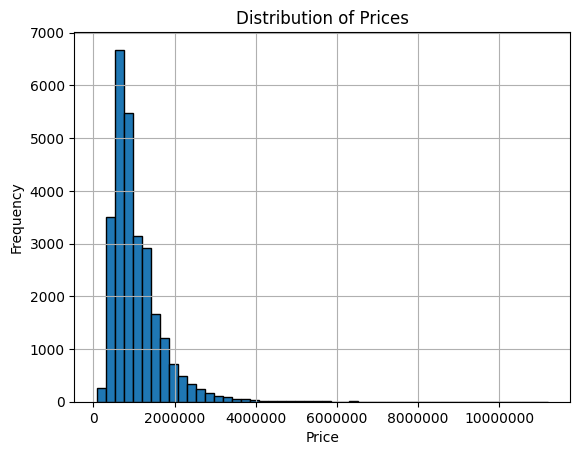

In [ ]:
df['Price'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

The histogram appears to be skewed right or "positive skewed" meaning there are with some expensive outlier house prices above the price of 2,000,0000. Althought skewed there is a normal distribution of prices between 0-2,000,000 which is close to the mean (of 1,000,000) and median (870,000)

## Feature Summary and Data Types
There are 22 columns in this dataset and thus are 22 features. Each of these features can be different types (object, int64, float64) and thus have different descriptions. In pandas a data frame has the attribute *dtype* which returns the type of each feature

In [ ]:
print(df.dtypes)

Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom          float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea      object
YearBuilt        float64
CouncilArea       object
Latitude         float64
Longtitude       float64
Regionname        object
Propertycount    float64
ParkingArea       object
Price            float64
dtype: object


Given the data types for each feature it can be seen that not all features are integers or floats, some are 'objects'.
The features who are either integers or floats can be summarised using the 'describe' method, this time pandas will summarise all the numeric features in the dataframe.

In [ ]:
print(df.describe())

         Rooms  Distance  Postcode  Bedroom  Bathroom      Car  Landsize  \
count 34857.00  34856.00  34856.00 26640.00  26631.00 26129.00  23047.00   
mean      3.03     11.18   3116.06     3.08      1.62     1.73    593.60   
std       0.97      6.79    109.02     0.98      0.72     1.01   3398.84   
min       1.00      0.00   3000.00     0.00      0.00     0.00      0.00   
25%       2.00      6.40   3051.00     2.00      1.00     1.00    224.00   
50%       3.00     10.30   3103.00     3.00      2.00     2.00    521.00   
75%       4.00     14.00   3156.00     4.00      2.00     2.00    670.00   
max      16.00     48.10   3978.00    30.00     12.00    26.00 433014.00   

       YearBuilt  Latitude  Longtitude  Propertycount       Price  
count   15551.00  26881.00    26881.00       34854.00    27247.00  
mean     1965.29    -37.81      145.00        7572.89  1050173.34  
std        37.33      0.09        0.12        4428.09   641467.13  
min      1196.00    -38.19      144.42     

We are still left to summarise the 'object' features who aren't numeric, being made up of strings (and maybe also numeric values). It turns out pandas can summarise objects using the 'describe()' function but I must specify to only describe those features whose type is 'object'.

Describing (or summarising) a feature column of type 'Object' provides the following values about the column...
*   **count** - Number of non-null entries
*   **unique** - Number of distinct values
*   **top** - Most frequent value appearing
*   **freq** - How often the top value appears (how often most frequent value appears)





In [ ]:
def createObjectsArray():
  objects = df.select_dtypes(include='object')

print(objects.describe())

           Suburb       Address   Type Method SellerG        Date  \
count       34857         34857  34857  34857   34857       34857   
unique        351         34009      3      9     388          78   
top     Reservoir  5 Charles St      h      S  Jellis  28/10/2017   
freq          844             6  23980  19744    3359        1119   

                    CouncilArea             Regionname ParkingArea  
count                     34854                  34857       34857  
unique                       33                      8           8  
top     Boroondara City Council  Southern Metropolitan     Carport  
freq                       3675                  11836        6243  


## Identifing Missing Values
There appears to be many missing values in the dataset, most commonly NaN or categorical features who strings have no value.
I plan to handle the missing data for numeric features by replacing the missing numeric data with the mean of the feature, for categorical features I plan to fill the missing categories with the mode ofthe feature, see the section below '**Handling missing data**'

In [ ]:
for col in list(df.columns):
    missing_values = df[col].isna().sum()
    if(missing_values != 0):
      print(f"{col} has {df[col].isna().sum()} missing values")

Distance has 1 missing values
Postcode has 1 missing values
Bedroom has 8217 missing values
Bathroom has 8226 missing values
Car has 8728 missing values
Landsize has 11810 missing values
BuildingArea has 21097 missing values
YearBuilt has 19306 missing values
CouncilArea has 3 missing values
Latitude has 7976 missing values
Longtitude has 7976 missing values
Propertycount has 3 missing values
Price has 7610 missing values


The type of the feature 'BuidlingArea' is an object hence it is a categorical feature, however the data in the feature rows are all integers (and missing values are listed an **NaN** or **inf**).

Since all the rows for this feature are strings containing integers I will convert the feature type from object to int64 as when I am filling in missing values, I don't want to use methods to fill in missing categorical feature values on a feature that is by right numeric.
I convert the BuildingArea feature from an object to int using the to_numeric() method giving the BuildingArea datafram column as an argument, I set errors='coerce' to ensure any NaN or inf will remain NaN.

For inf and -inf values the second line repleaces the inf and -inf with NaN (using numpy as np)

In [ ]:
df['BuildingArea'] = pd.to_numeric(df['BuildingArea'], errors='coerce')
df['BuildingArea'].replace([np.inf, -np.inf], np.nan, inplace=True)

createObjectsArray()

# Exploratory Data Analysis

## Visualising numeric variables distribution using histograms and box plot
The numeric variables (which are features who are numbers, not objects),can each be plotted as a histogram or box plot using the pylot module that comes with the matplotlib library. Doing so is similar to how I plotted the *Price* column above, now I need to have an array of all the columns I want to plot, called "numeric_columns" ,with this I can use pandas to plot all the specified columns in the array

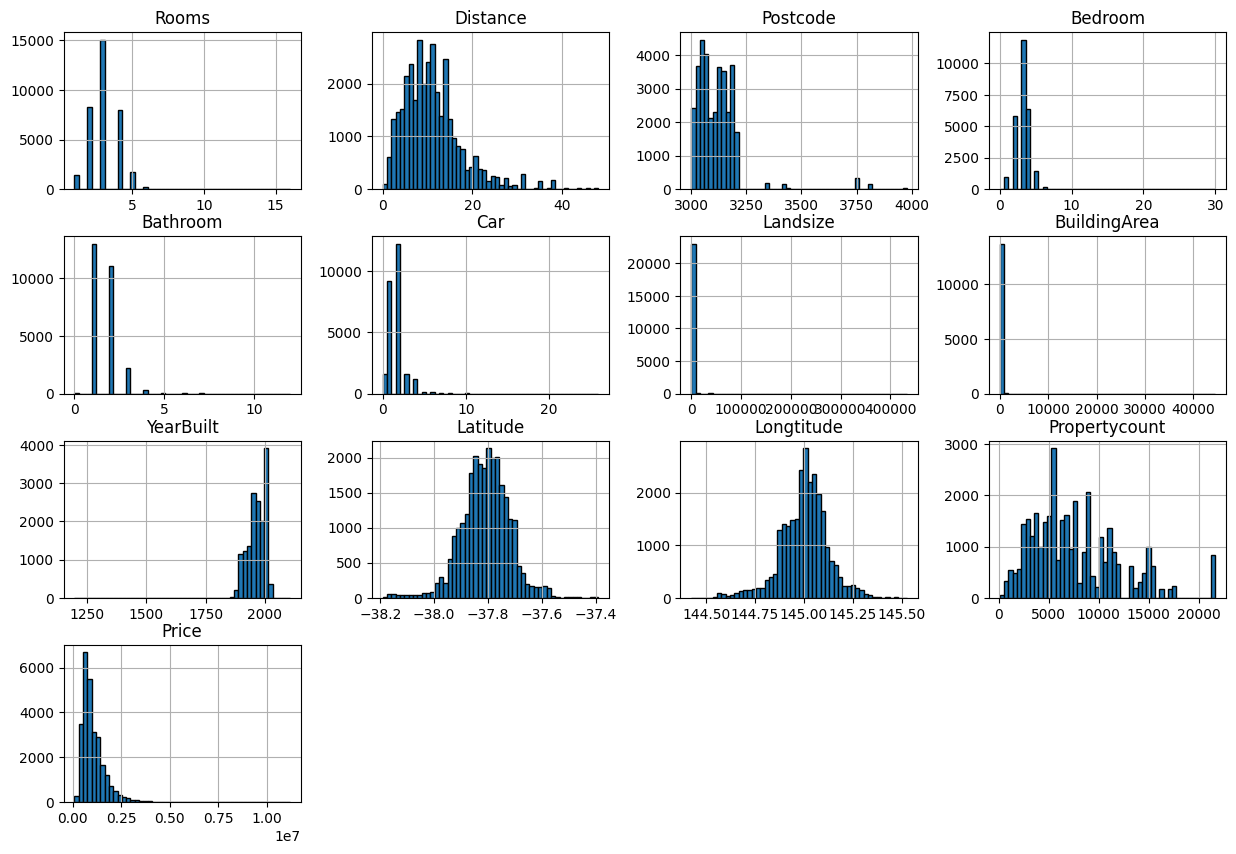

In [ ]:
numerics = ['int64', 'float64']
numeric_features = df.select_dtypes(include=numerics)

def createNumericHistogram():
  numeric_features.hist(bins=50, figsize=(15, 10), edgecolor='black')
  plt.ticklabel_format(style='plain')
  plt.show()

createNumericHistogram()

Now to plot the numeric variables as box plots Pandas contains the function 'boxplot()' which will create a box plot of the numeric feature.
The code belows loops on all columns (using the numeric_feature array from above) and creates a box plot for each numeric feature

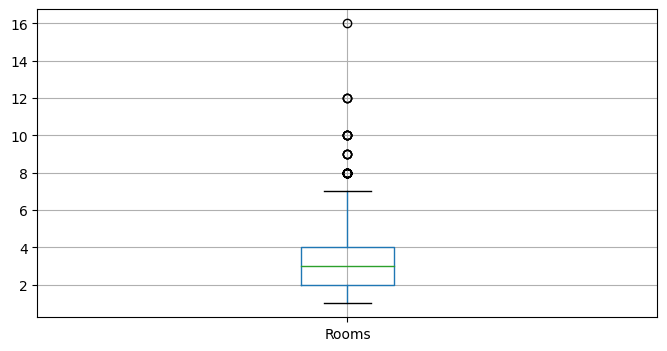

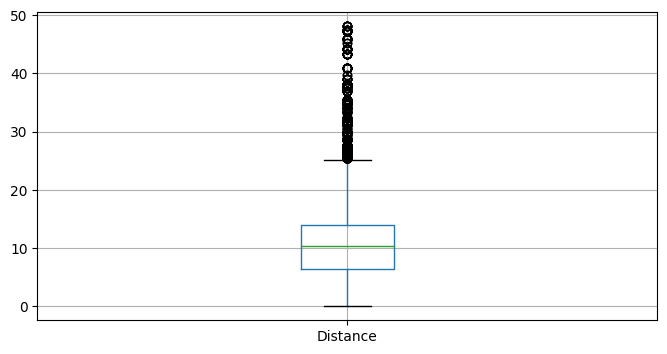

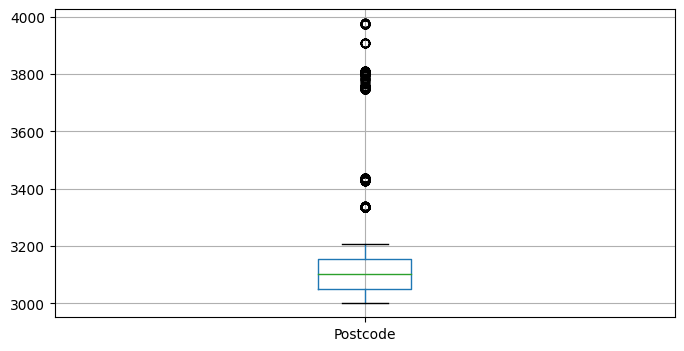

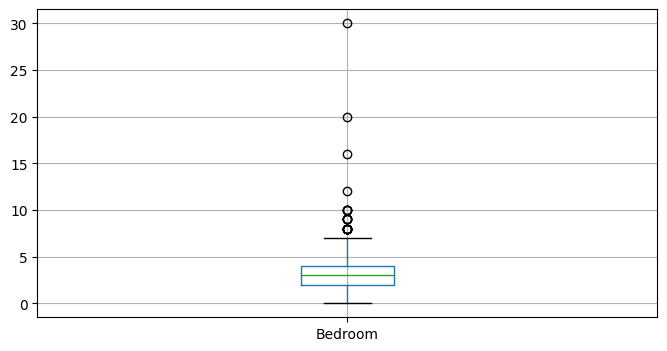

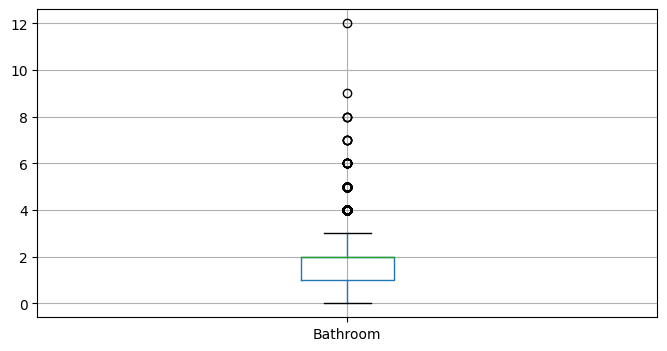

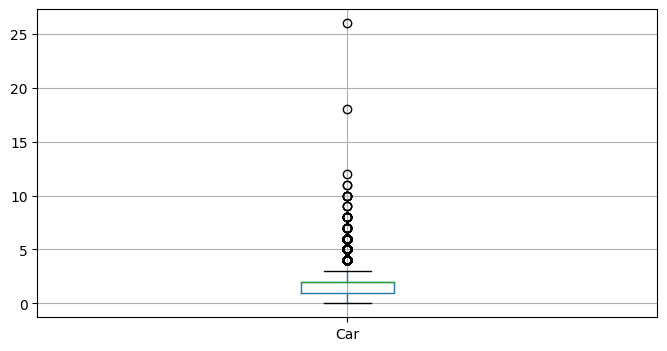

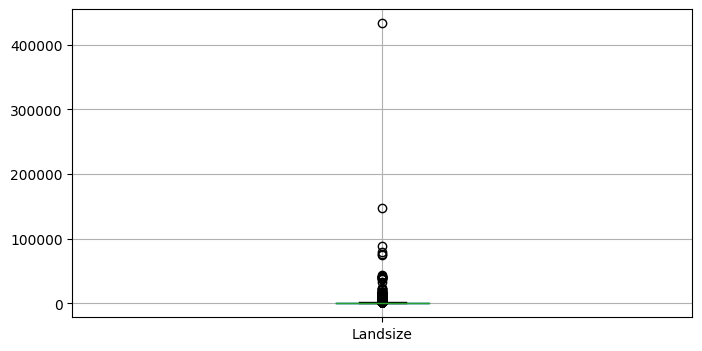

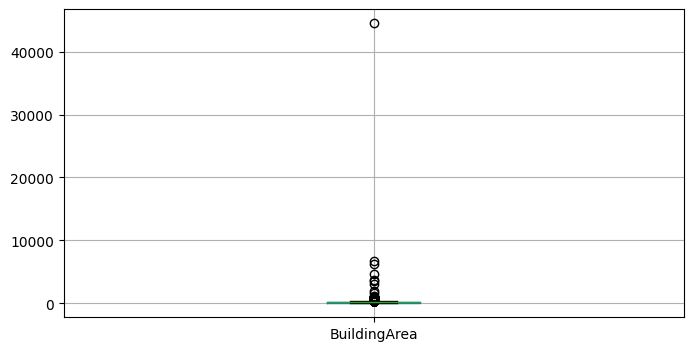

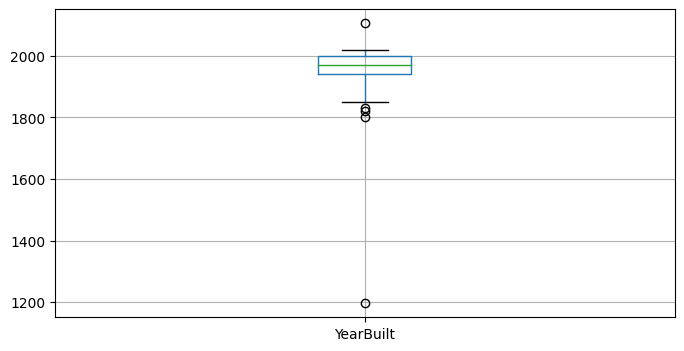

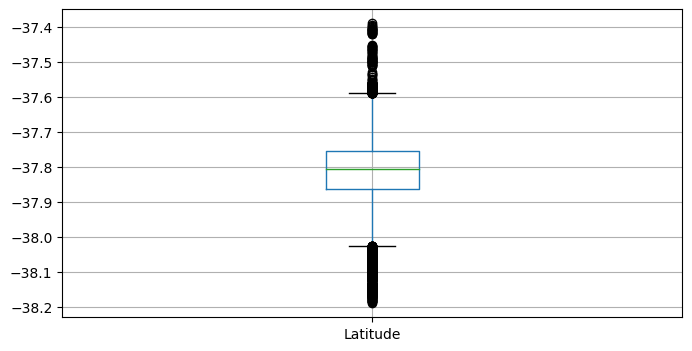

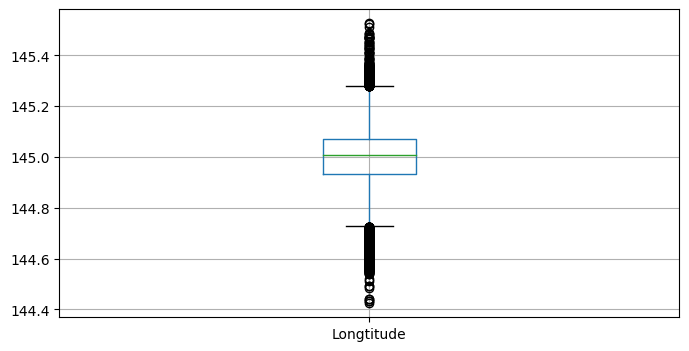

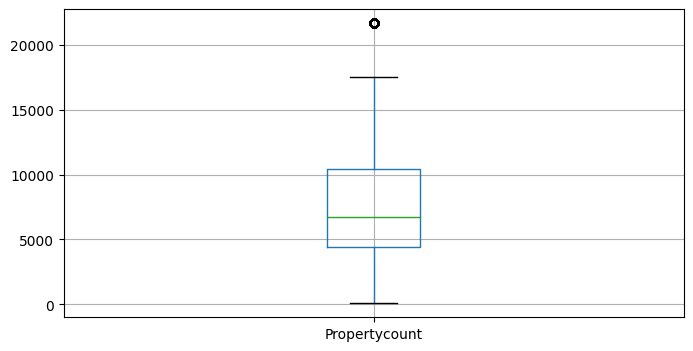

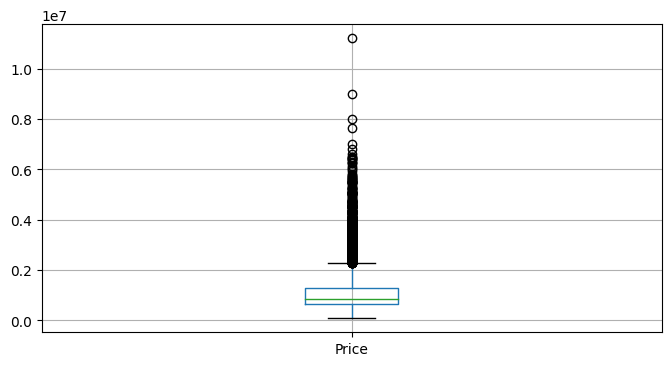

In [ ]:
def createNumericBarPlot():
  for col in numeric_features.columns:
    b_plot = df.boxplot(column = col, figsize=(8, 4))
    b_plot.plot()
    plt.show()

createNumericBarPlot()

After running the code you should see many of the box plots contain little circles, these are outliers. Features such as *Price*, *Latitude*, *Longitude*, *Landsize*, *Distane* and *Postcode* appear to have many outliers.

Boxplot feature outliers, like *Latitude*, *Longitude* and *Distane* give us a reference for the houses built away from other houses. Boxplot feature outliers like *Room*, *Bedroom*, *Bathroom* and *Car* seem to follow the same distribution which make sense, as a house with more Rooms is more likely to have more bedrooms, bathroms and space for cars.

## Exploring relationships between features and the target variable


### Scatter Plots
Using scatter plots to see the relationship between features and the target variable *Price* is done using the pandas 'scatter()' method, which is called on the plot.
In the code below I loop through each of the numeric features, check if it is not equal to *Price* (the target variable) and use the .scatter() method to plot the feature on the x axis and *Price* on the y axis

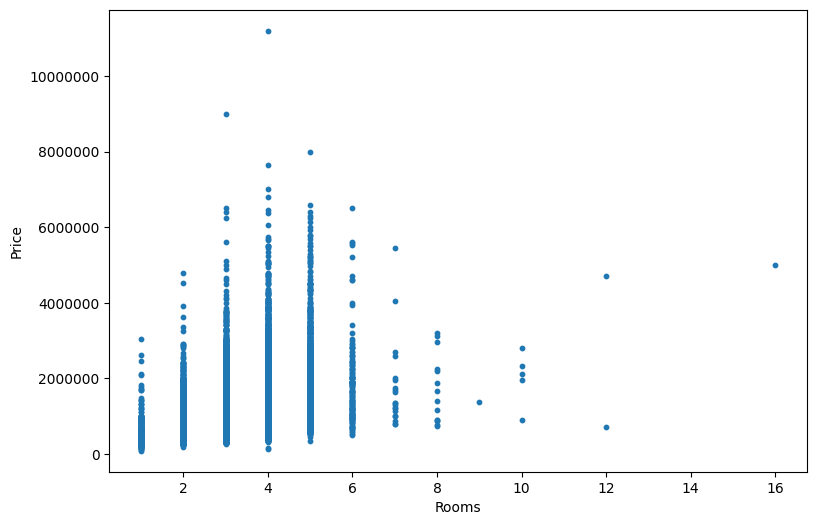

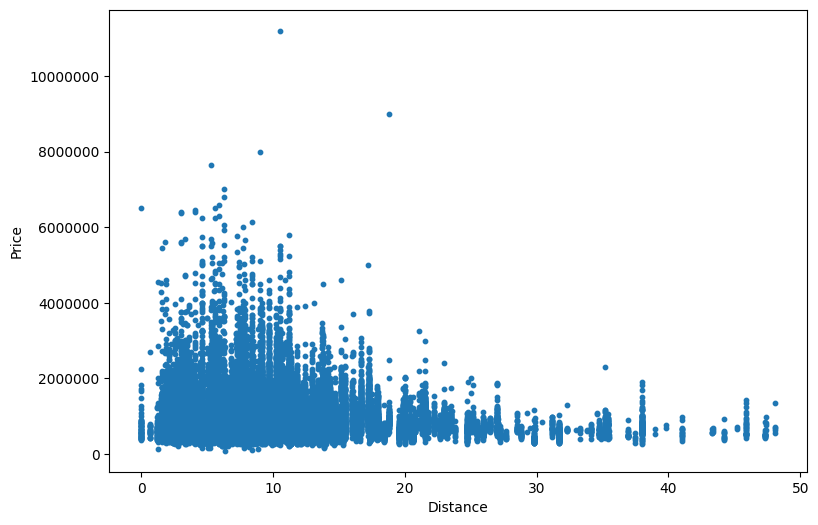

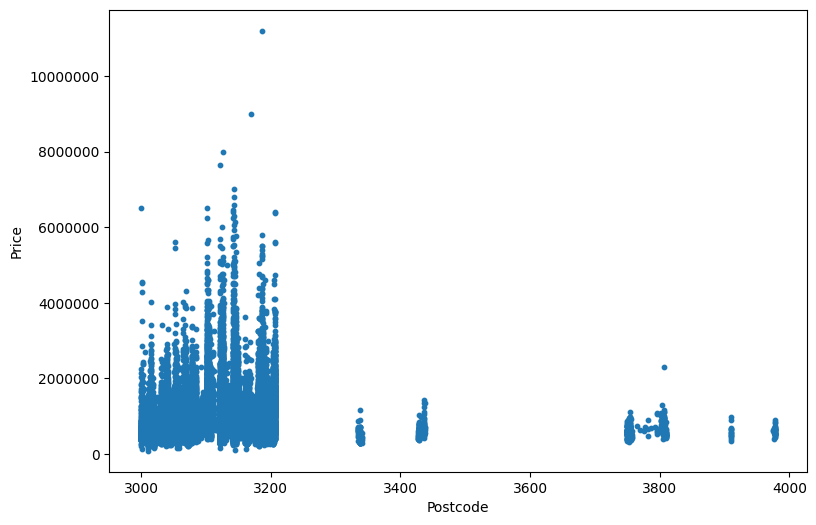

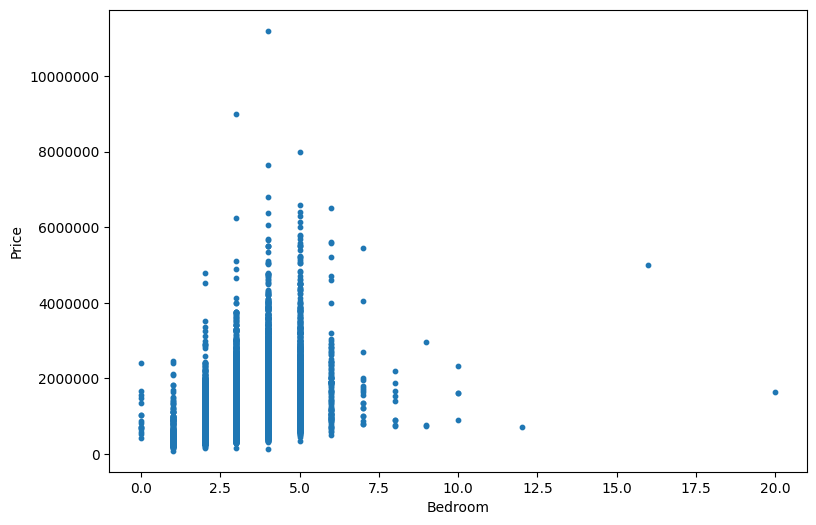

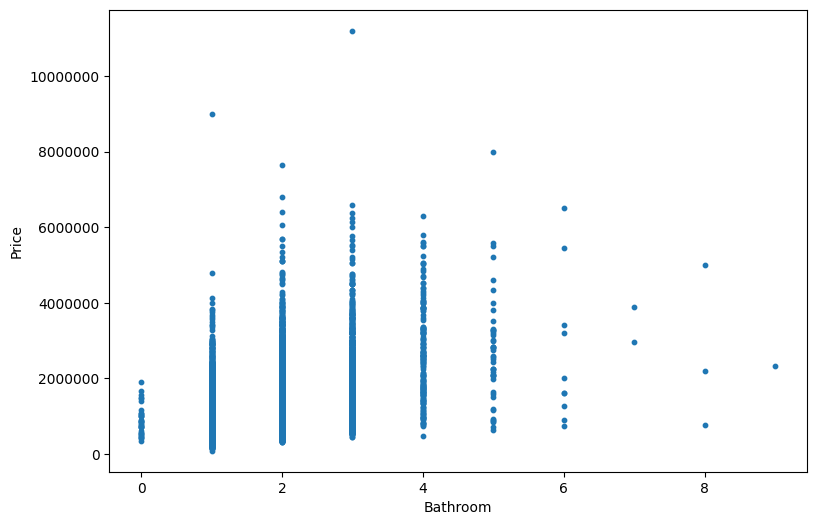

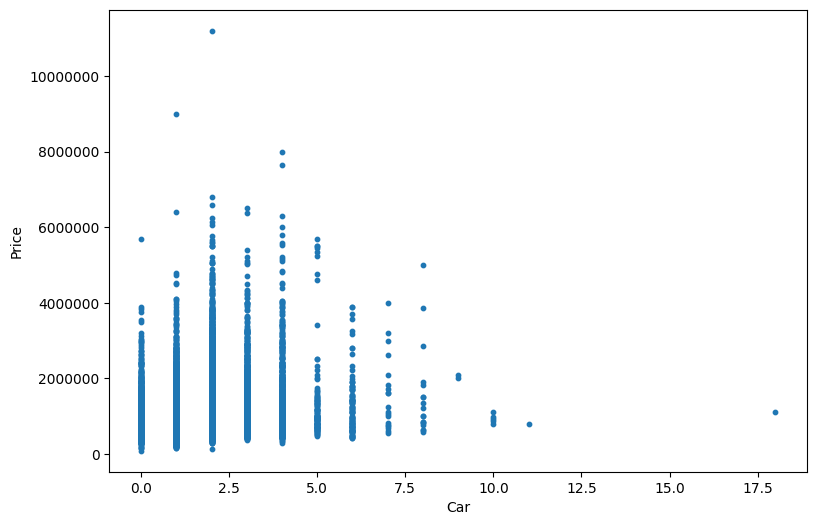

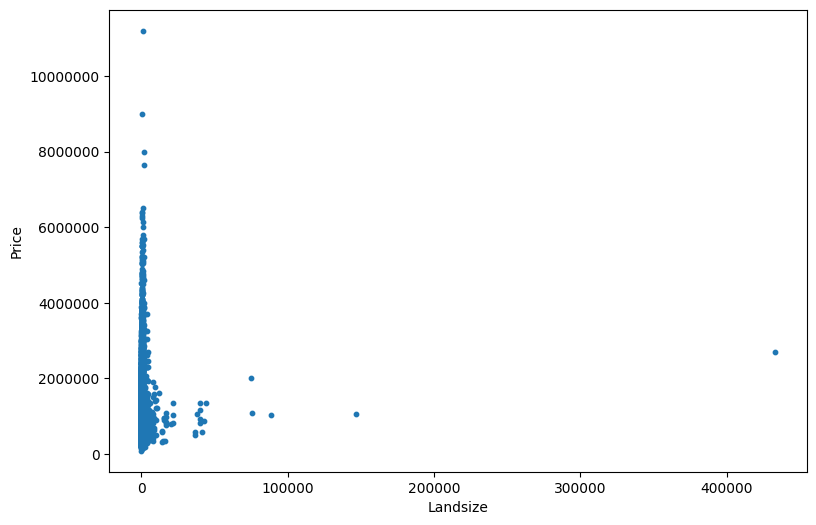

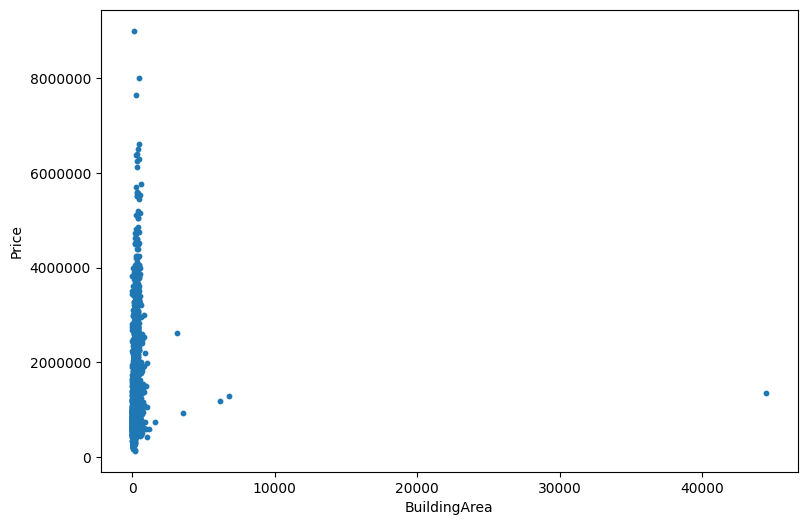

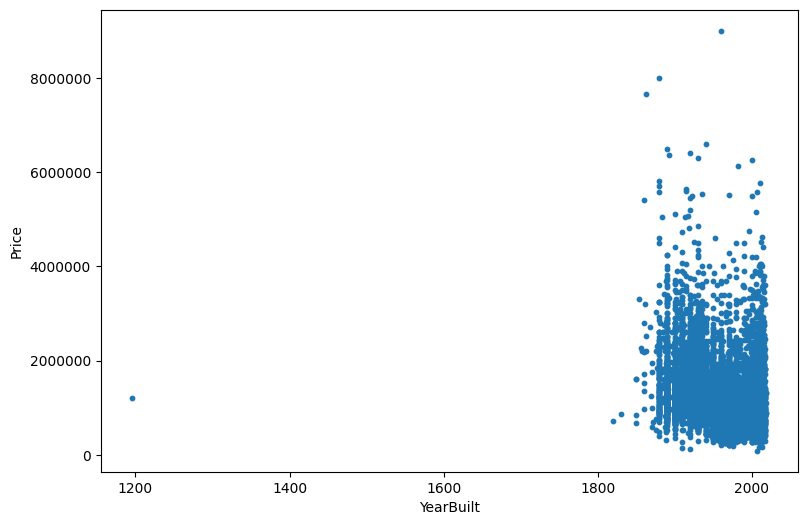

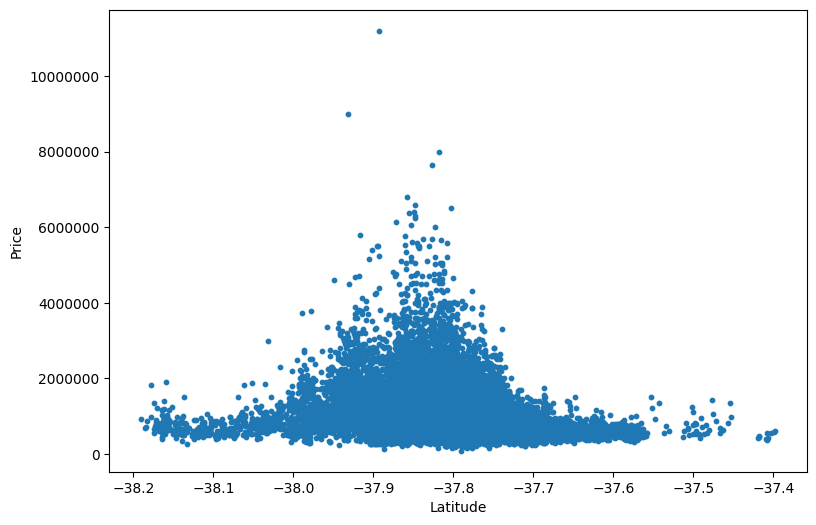

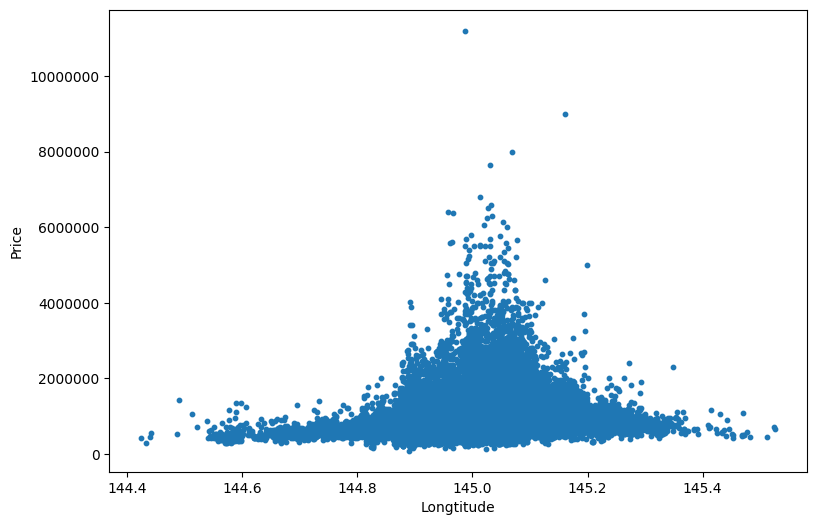

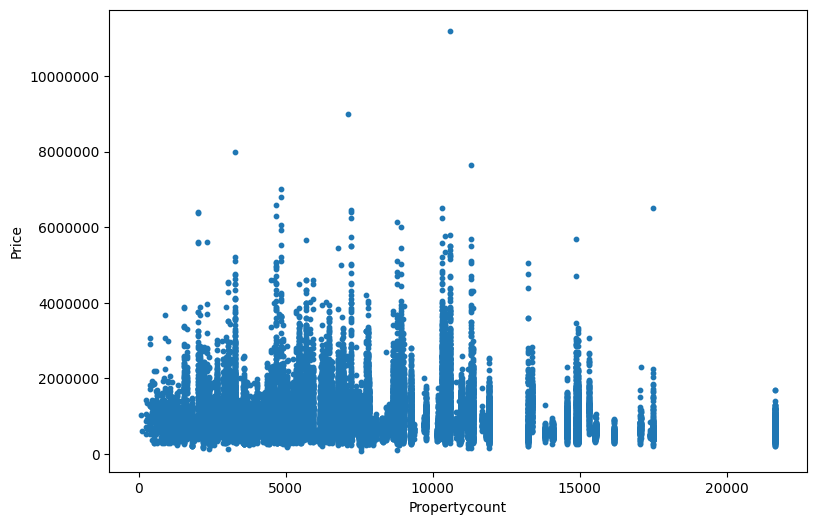

In [ ]:
for col in numeric_features.columns:
  if col != 'Price':
      df.plot.scatter(x = col, y = 'Price', s = 10, figsize=(9, 6))
      plt.ticklabel_format(style='plain')

### Correlation Matrices
In order to create a correlation matrix we can use the '.corr' method provided by Pandas, which creates a traditional correlation table, not a graphic but an actual table. This table can be styled by styling the dataframe, doing so by accessing the dataframes .style then .background_gradient attributes and assigning a colour map, cmap, in this case 'coolwarm'.
This cmap will use the correlation values to assign one of two colours on a gradient scale from 0-1, 0 being one colour and 1 being the other colour.
With coolwarm a positive correlation (from 0.5-1) is red and a negative (0.5-0) is blue.
When you run the code you will see the correlation matrix.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-334-f0f86bb9996e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-334-f0f86bb9996e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longtitude,Propertycount,Price
Rooms,1.00,0.27,0.09,0.95,0.61,0.39,0.04,0.16,-0.01,0.00,0.10,-0.07,0.47
Distance,0.27,1.00,0.48,0.27,0.13,0.24,0.06,0.08,0.32,-0.10,0.20,-0.02,-0.21
Postcode,0.09,0.48,1.00,0.09,0.12,0.07,0.04,0.04,0.09,-0.23,0.36,0.02,0.04
Bedroom,0.95,0.27,0.09,1.00,0.61,0.39,0.04,0.15,-0.00,0.00,0.11,-0.05,0.43
Bathroom,0.61,0.13,0.12,0.61,1.00,0.31,0.04,0.15,0.17,-0.06,0.11,-0.03,0.43
Car,0.39,0.24,0.07,0.39,0.31,1.00,0.04,0.10,0.13,-0.01,0.05,-0.01,0.20
Landsize,0.04,0.06,0.04,0.04,0.04,0.04,1.00,0.35,0.04,0.03,-0.00,-0.02,0.03
BuildingArea,0.16,0.08,0.04,0.15,0.15,0.10,0.35,1.00,0.07,0.02,-0.00,-0.02,0.10
YearBuilt,-0.01,0.32,0.09,-0.00,0.17,0.13,0.04,0.07,1.00,0.09,-0.02,0.02,-0.33
Latitude,0.00,-0.10,-0.23,0.00,-0.06,-0.01,0.03,0.02,0.09,1.00,-0.35,0.01,-0.22


**NOTE: The correlation matrix won't load on the pdf so I include an image**

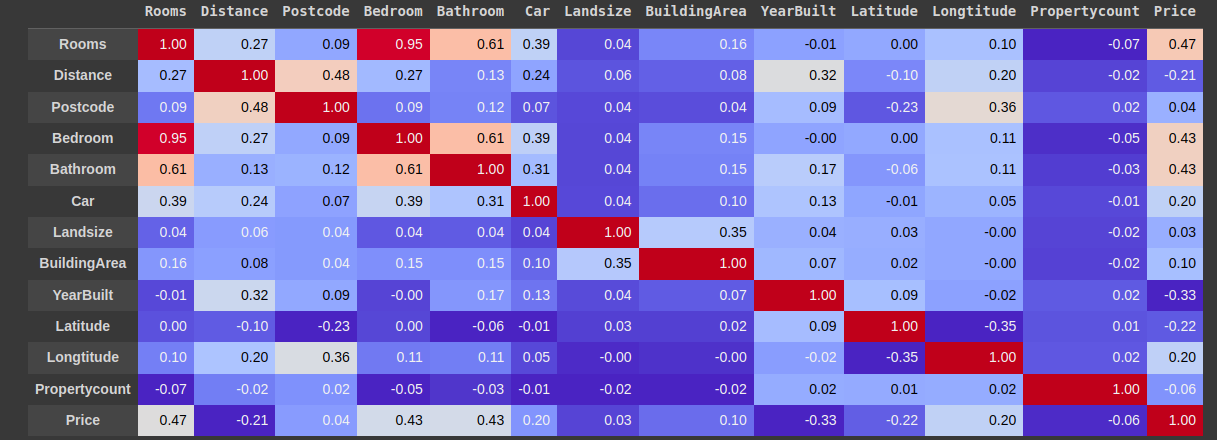

Now with both the scatter plots and correlation matrix we can see the relationships between features.
Room appears to have a positive correlation with Bedroom (0.95) and Bathroom (0.61), this makes sense as the number of bedrooms/bathrooms increases with the number of Rooms. This can also be seen on the scatter plots of all three, as the x-axis moves in, the peaks of the y-axis go up.

Price appears to have a moderate positive relationship with Rooms, Bedrooms and Bathroom (above 0.4), this makes sense since more Rooms will increase the value of a house. Price also has a slight negative correlation with Distance (-0.21) and YearBuilt (-0.33), which makes sense, the bigger the distance to the city the less the house price and house prices descrease with age.

## Examining categorical variables

### Bar-Plot
In order to plot the frequencies of each value for a feature I can use the value_counts() method which gets the count of each unique value in a feature.Once I have the value count, I can plot it using plot(kind='barh') setting the kind to 'barh' in order for horizontal bars

If a categorical feature contains many unique values then plotting the bar plot results in a vertically squished plot and takes a long time to load.

I account for this by creating two arrays, *small_cat* is all the categorical features  with less than 30 unique values, *big_cat* is all the categorical features  with more than 30 unique values.

The code below assigns values to the small_cat and big_cat arrays, it plots the frequency table for the small_cat array.

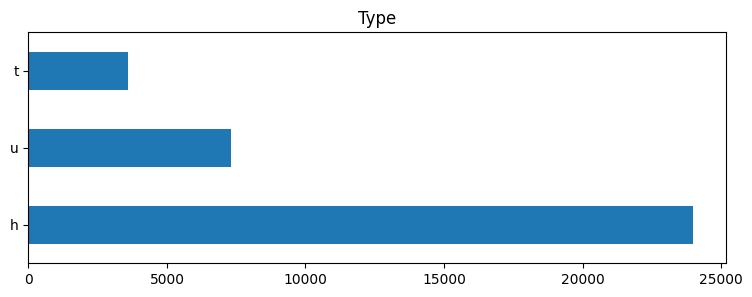

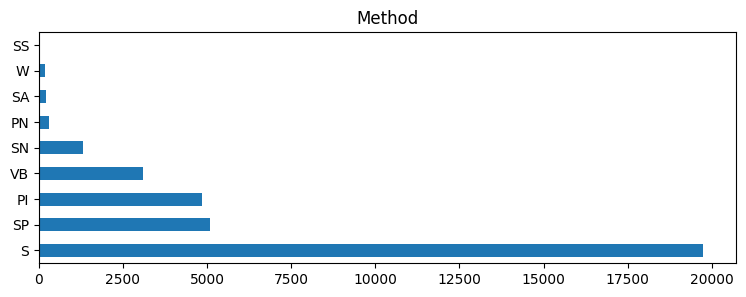

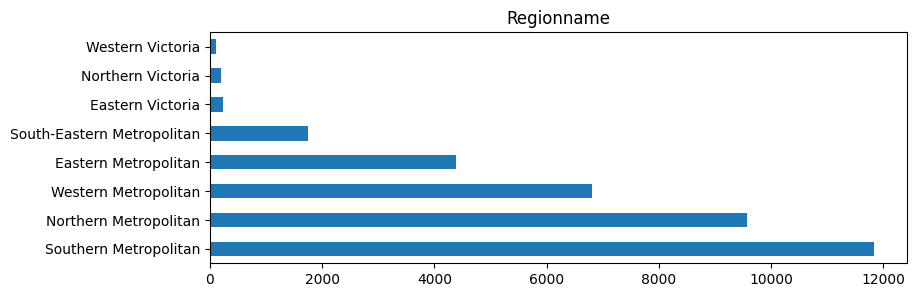

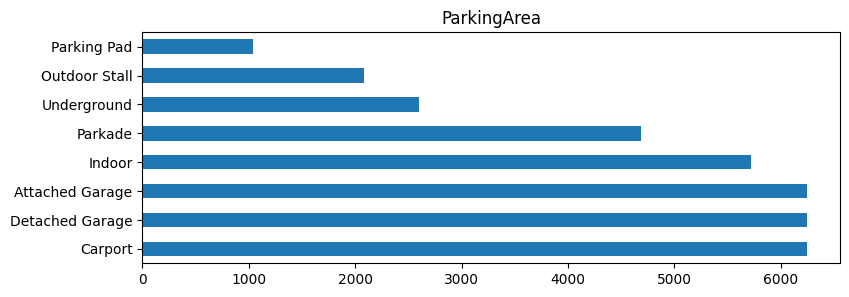

['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']


In [ ]:
#  df['Suburb'].value_counts().head(10).plot(kind='bar')
small_cat = []
big_cat = []
for col in objects.columns:
  value_count = objects[col].value_counts()
  if len(value_count) < 30:
    small_cat.append(col)
    plt.figure(figsize=(9, 3))  # Set the figure size for each plot
    plt.title(col)
    objects[col].value_counts().plot(kind='barh')
    plt.show()
  else:
    big_cat.append(col)
#print(small_cat)
print(big_cat)


This code plots the frequency table for the *big_cat* array, since there is many duplicate values less than 10, so many repeated 1's, 2's etc I use the head(100) method to get the top 100 most frequent unique values and plot them

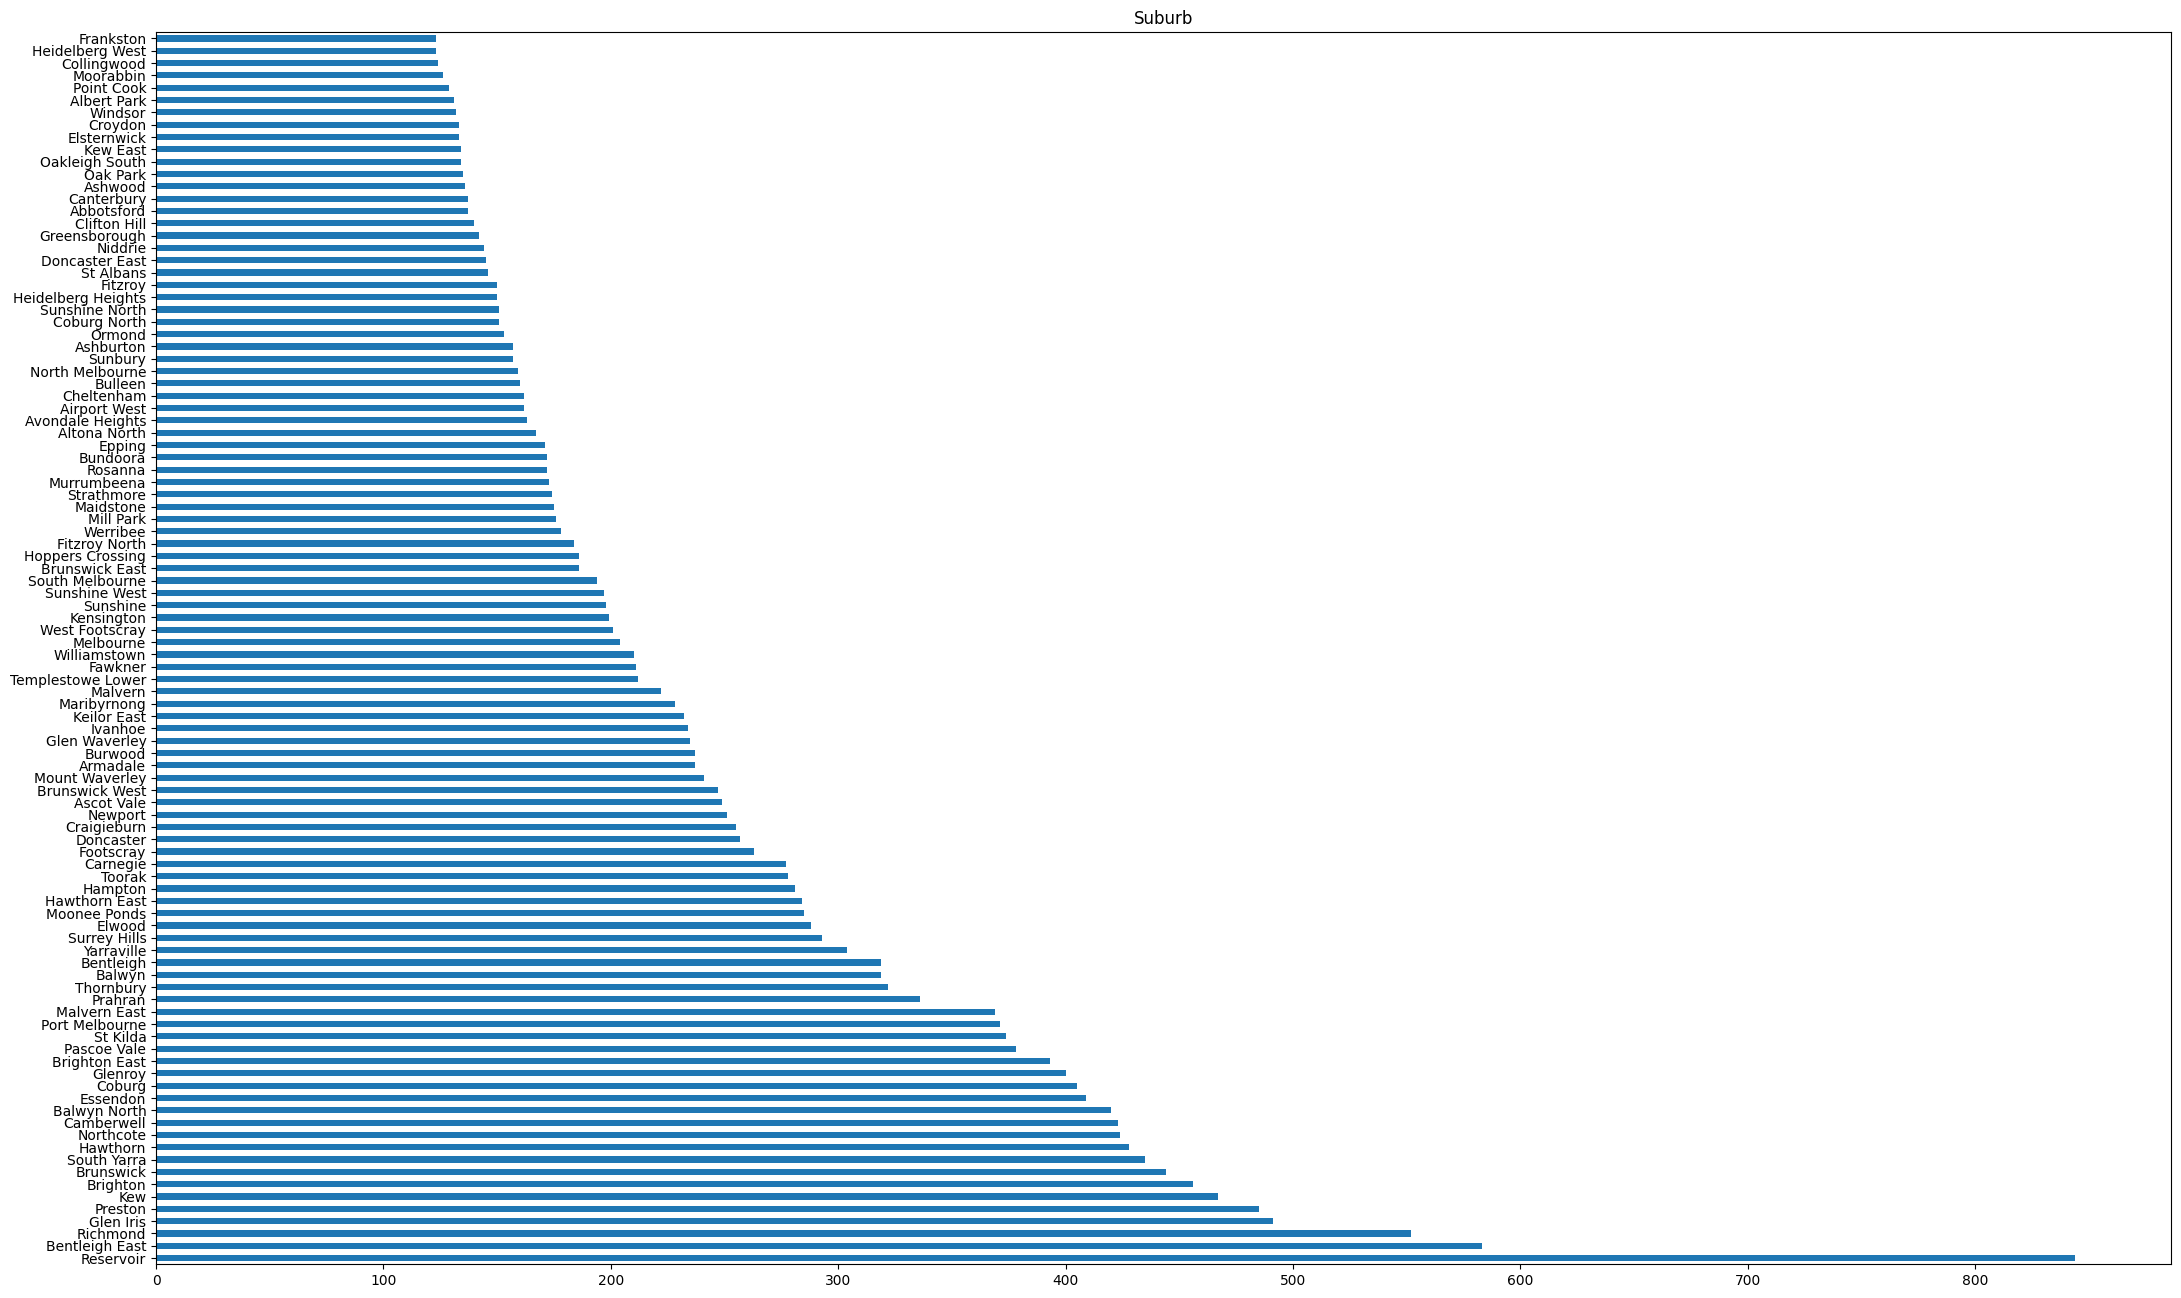

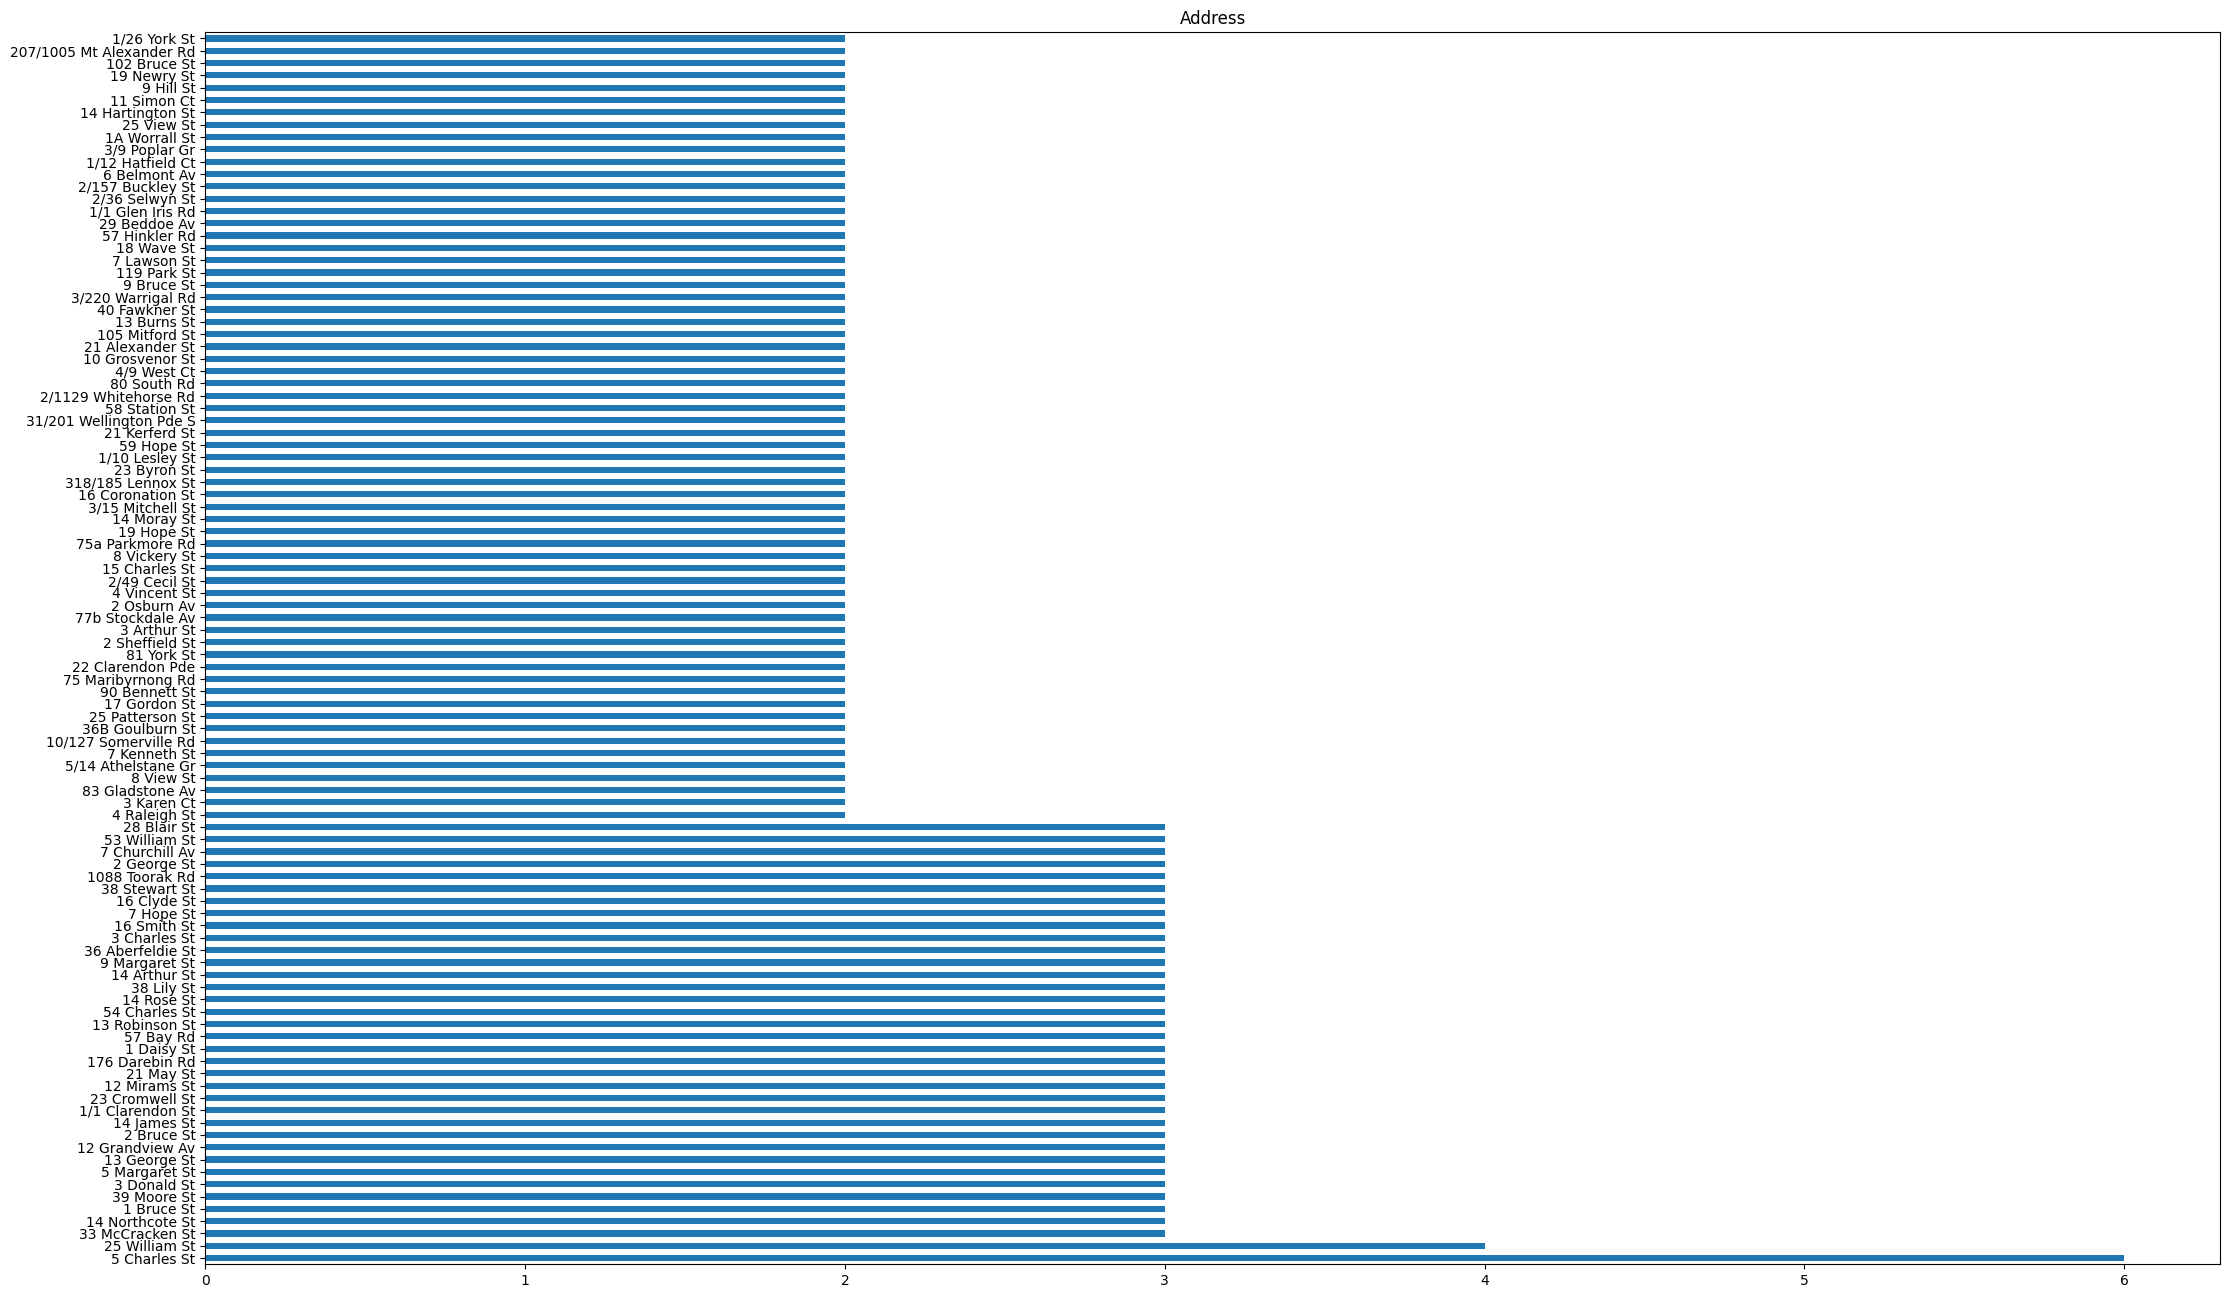

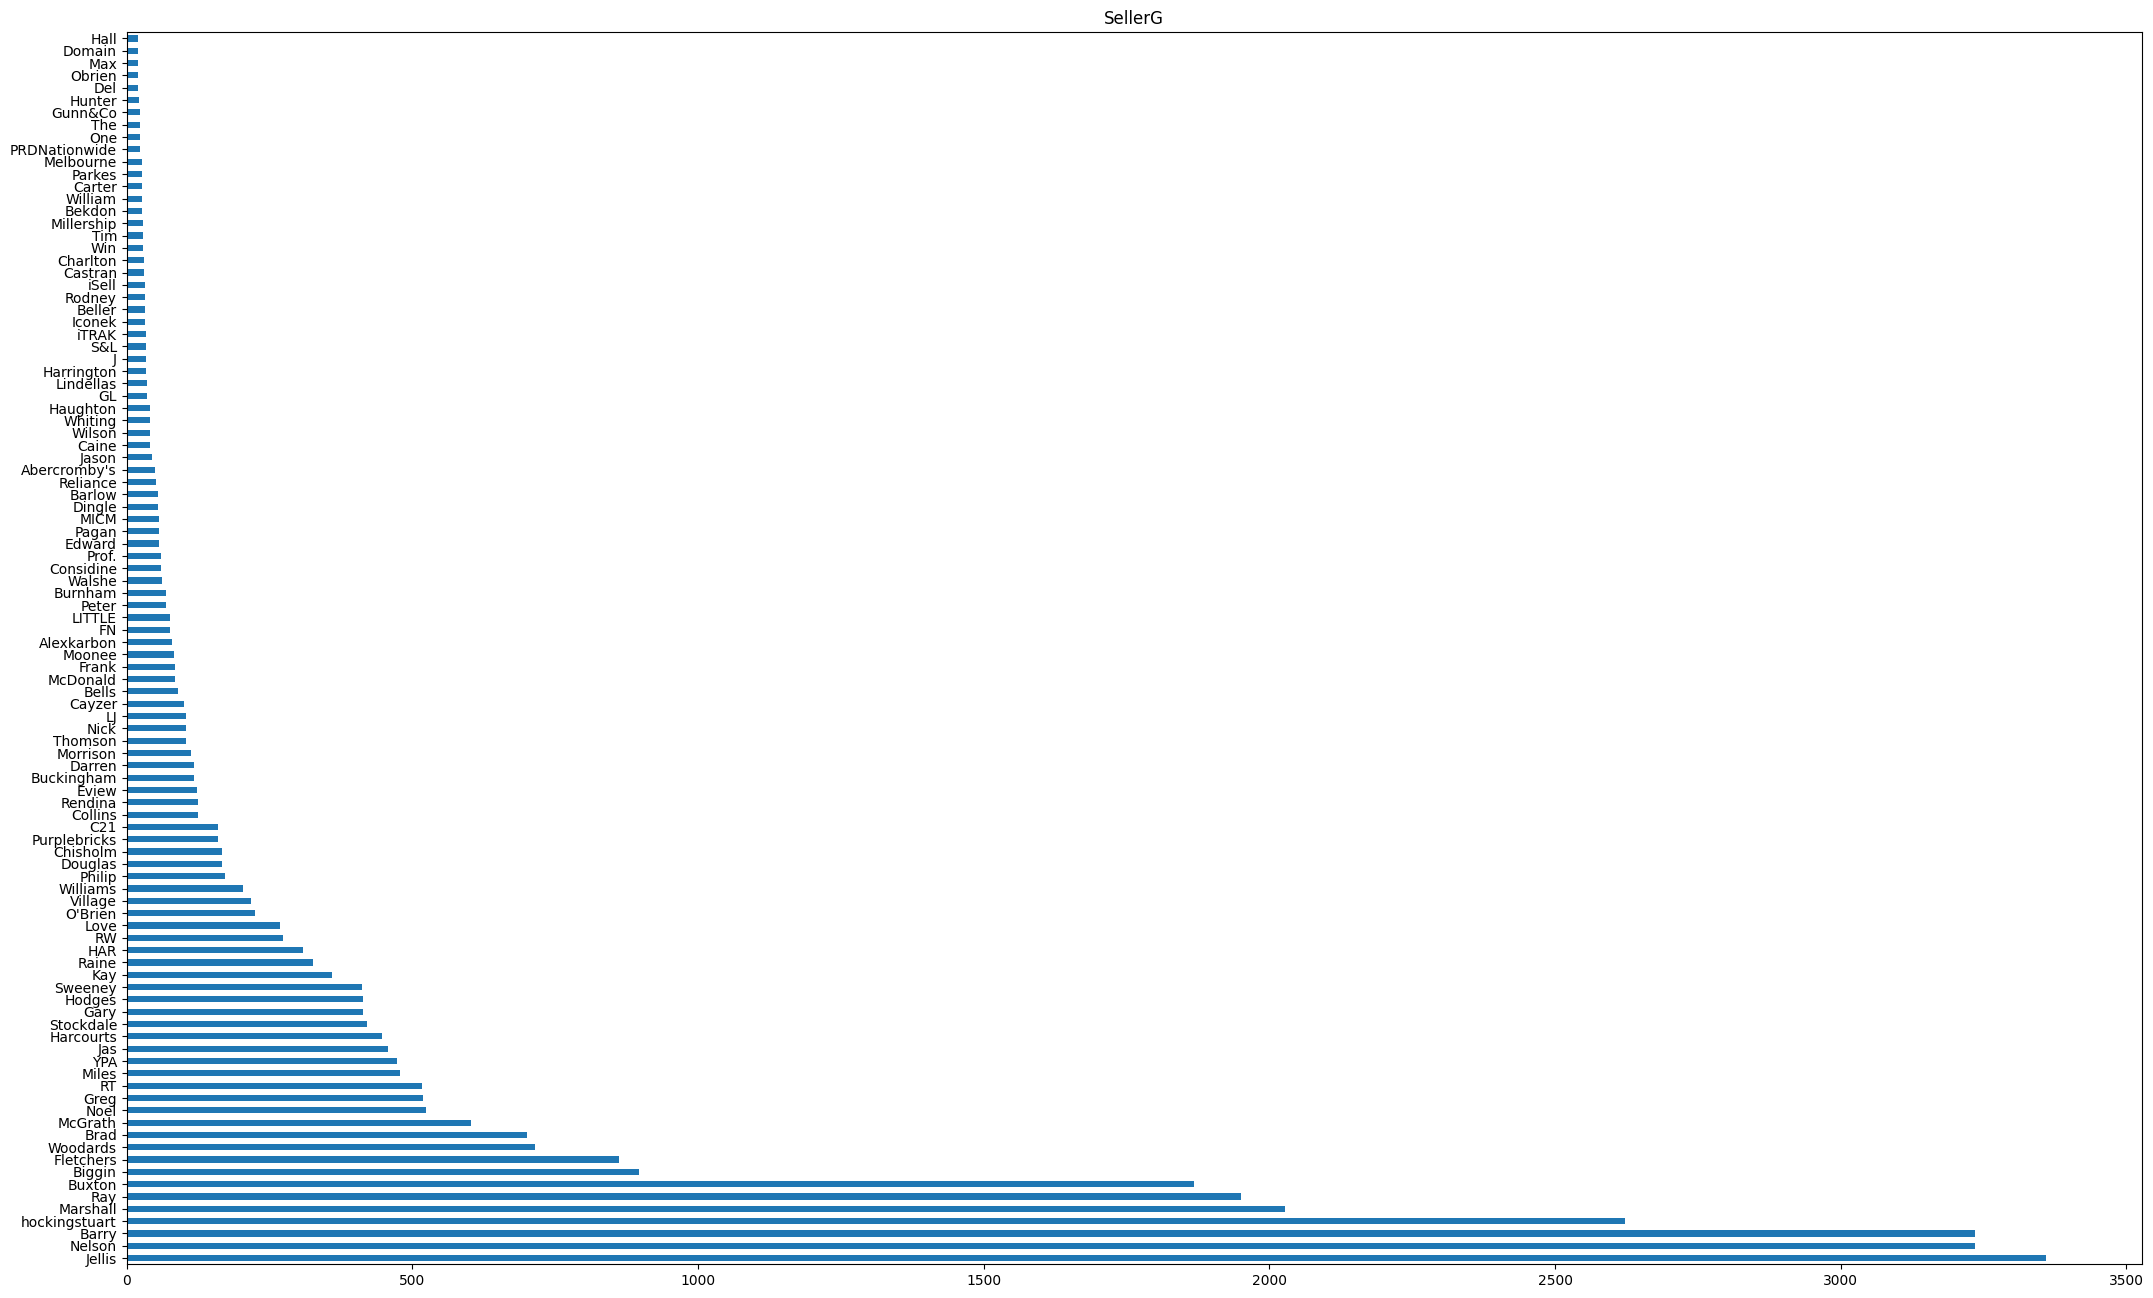

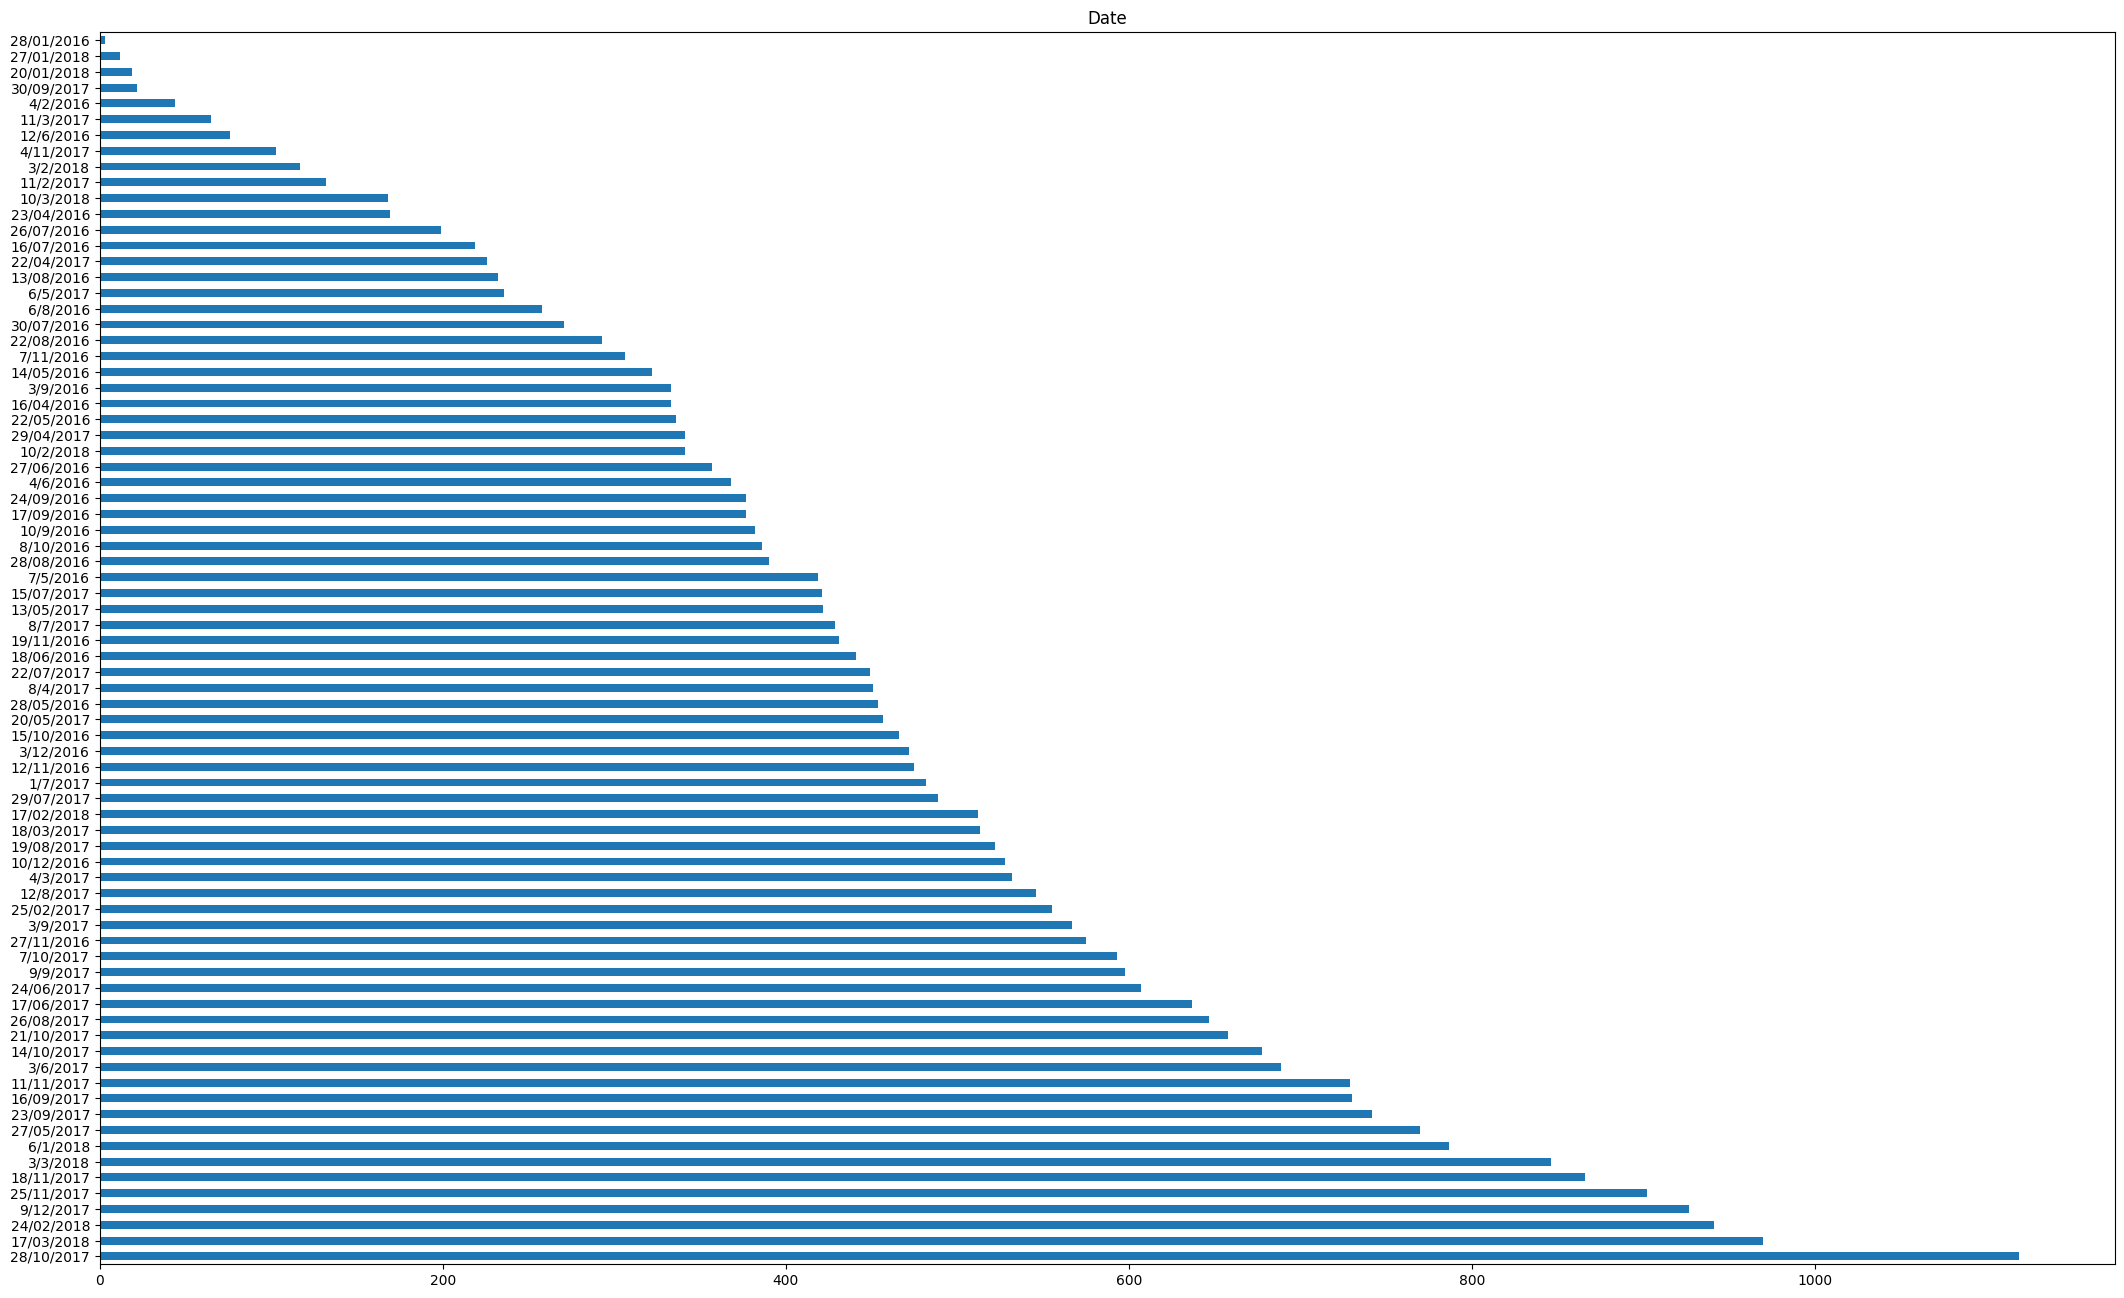

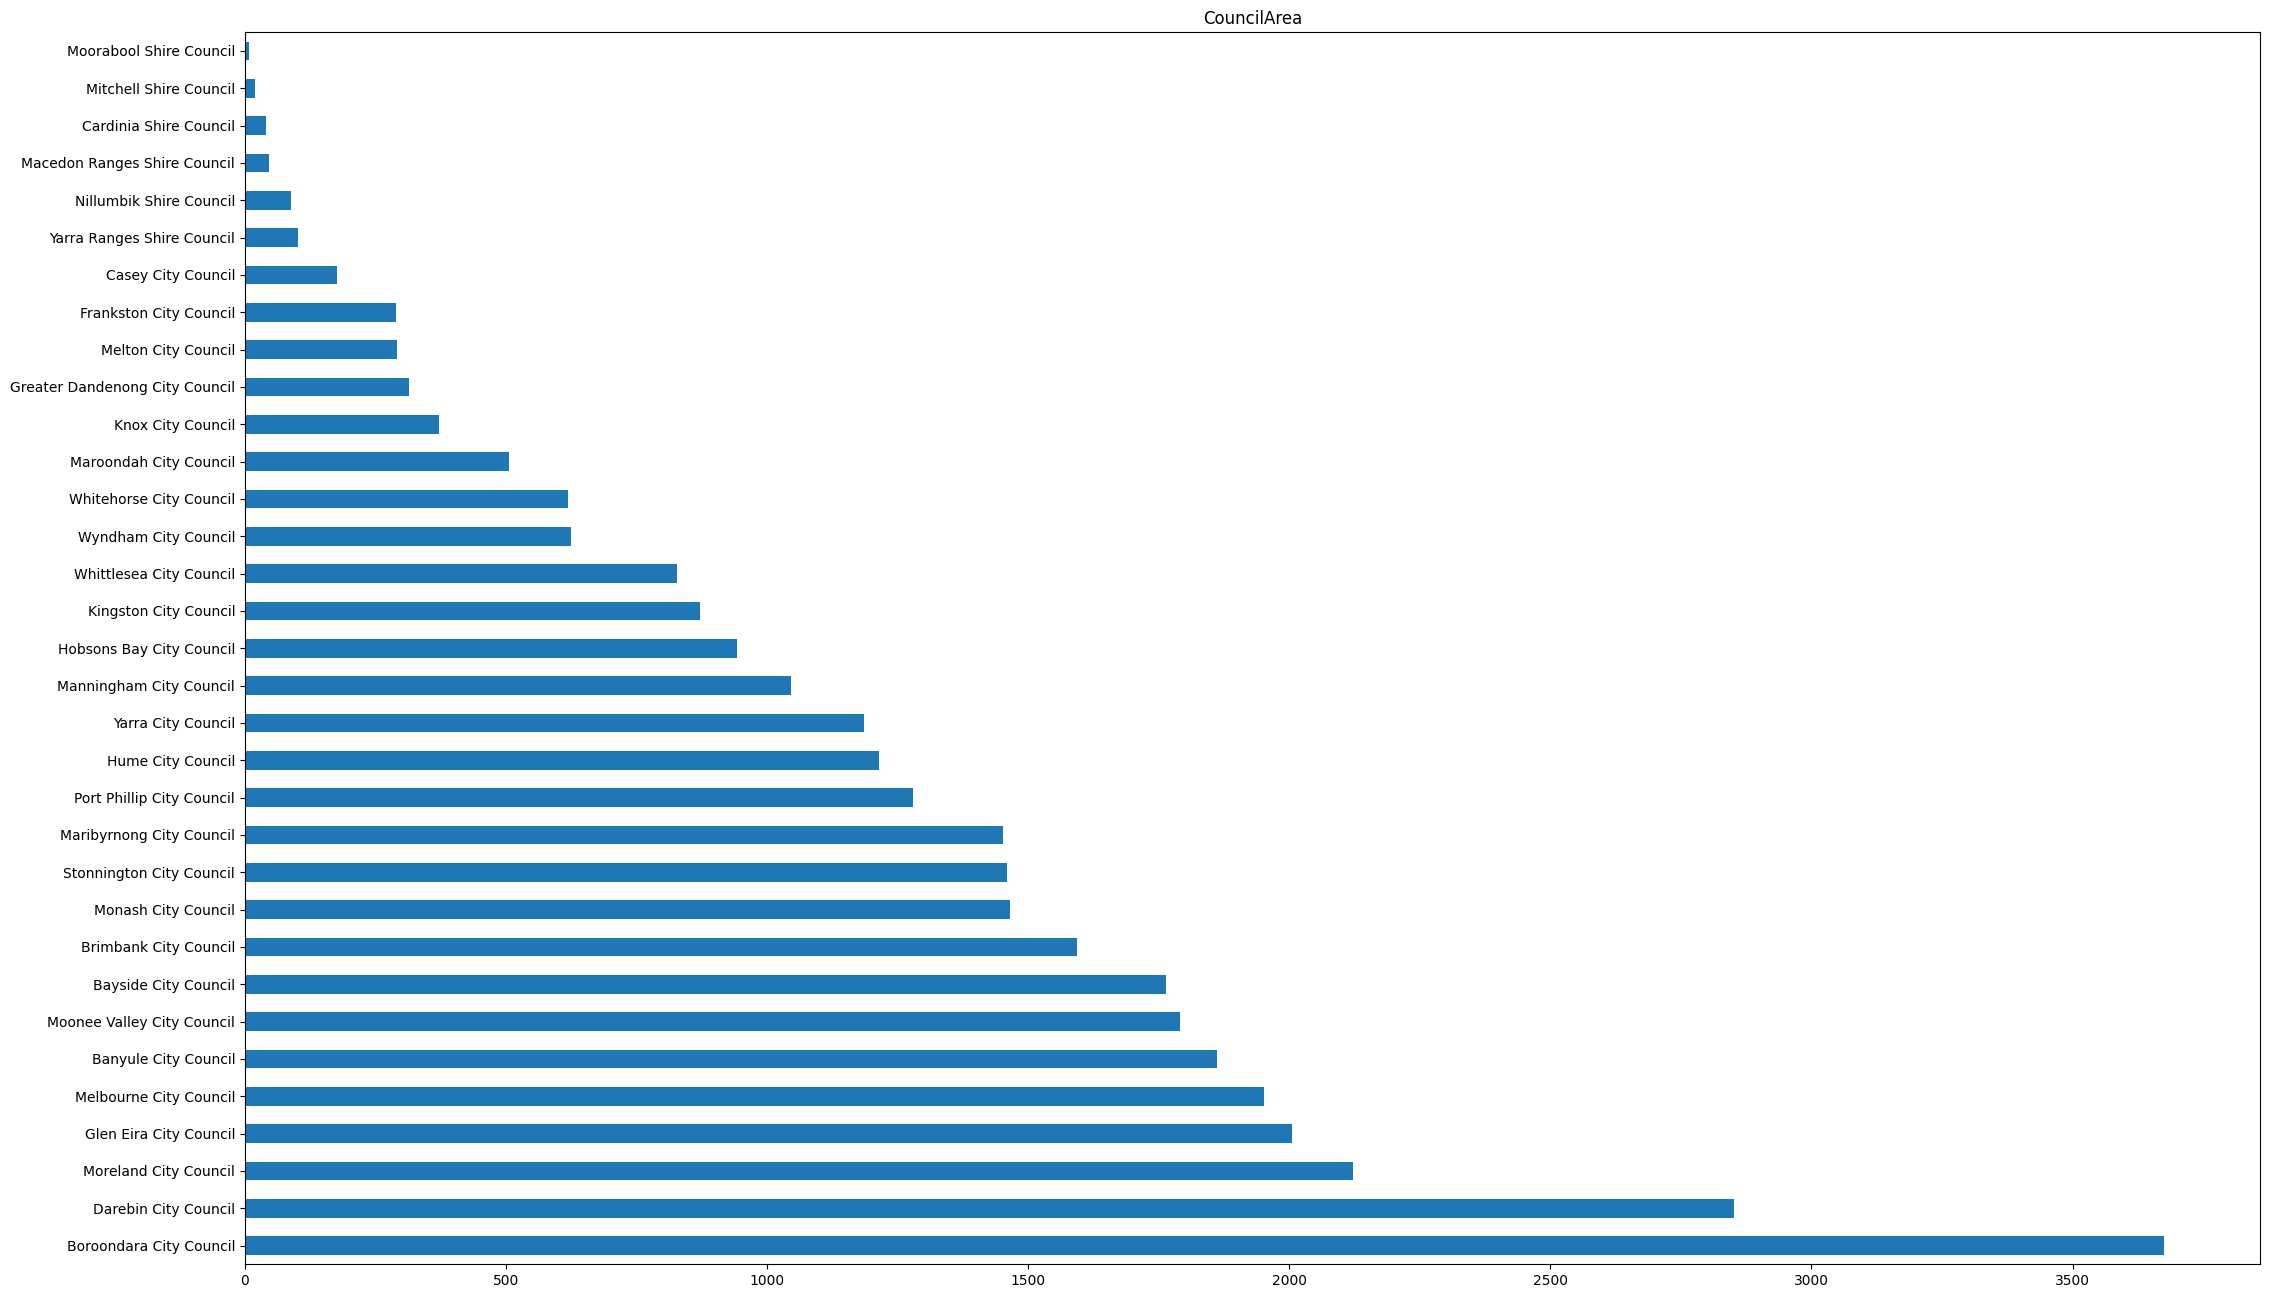

In [ ]:
for col in big_cat:
  plt.figure(figsize=(26, 16))  # Set the figure size for each plot
  plt.title(col)
  objects[col].value_counts().head(100).plot(kind='barh')
  plt.show()

### Frequency table
A frequncy table prints the frequancy for each unique value for a categorical feature. I do so by printing the value_counts() for a feature.
In the code below I do so for all the features in the the *small_cat* array

In [ ]:
for col in small_cat:
  print('#############',col,'#############')
  print(df[col].value_counts())
  print('\n')

############# Type #############
h    23980
u     7297
t     3580
Name: Type, dtype: int64


############# Method #############
S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64


############# Regionname #############
Southern Metropolitan         11836
Northern Metropolitan          9560
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64


############# ParkingArea #############
Carport            6243
Detached Garage    6243
Attached Garage    6243
Indoor             5722
Parkade            4682
Underground        2602
Outdoor Stall      2081
Parking Pad        1041
Name: ParkingArea, dtype: int64




I do the same thing for th *big_cat* array, notice the first line
pd.set_option('display.max_rows', None), ensures that no unique values frequency is skipped

In [ ]:
pd.set_option('display.max_rows', None)

for col in big_cat:
  print('#############',col,'#############')
  print(df[col].value_counts().head(5))
  print('\n')

############# Suburb #############
Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
Name: Suburb, dtype: int64


############# Address #############
5 Charles St       6
25 William St      4
33 McCracken St    3
14 Northcote St    3
1 Bruce St         3
Name: Address, dtype: int64


############# SellerG #############
Jellis           3359
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
Name: SellerG, dtype: int64


############# Date #############
28/10/2017    1119
17/03/2018     970
24/02/2018     941
9/12/2017      927
25/11/2017     902
Name: Date, dtype: int64


############# CouncilArea #############
Boroondara City Council    3675
Darebin City Council       2851
Moreland City Council      2122
Glen Eira City Council     2006
Melbourne City Council     1952
Name: CouncilArea, dtype: int64




## Outliers
When it comes to categorical data it is hard to find outliers, most can be classified as 'anamolies', that being something different than normal behaviour (or what is seen for majority of cases).
One impact these outliers/anomolies is seen in frequncy tables for big_cat categories, unique values that appear once take a good portion of the rows for a feature, being listed once, this is why I had to only inlcude the top 100 when creating the bar plots for big_cat features.

An example of many one off unique values can be seen with the 'Suburb' and 'Buidling' features, both contain many one off unique values which can be considered anomolies, just one off houses not living in urban areas.

Most anomolies can be seen in the small_cat feauture bar plots. The feature *Type* most frequent type, **h**, is 3.2 times more freuquent than type **u**.

This can also be seen for the *Method* feature, method **S** (19,774) is 3.87 times times more freuquent than **SP** (5095)


# Feature Engineering

## Handling missing data (imputation methods)
There does appear to be missing data in the dataset, for both numeric and categorical features.
The code below prints all the features with missing values, using the isna() method with sum() to get the count of missing values. I put the code in a function **print_missing()** to check if the values have been filled in.

Note, only two categorical features,*BuildingArea* and *CouncilArea* ,have missing values, 21097 and 3 respectively

In [ ]:
missingValueFeature = []

def print_missing(missingValueFeature):
  for col in list(df.columns):
    missing_values = df[col].isna().sum()
    if(missing_values != 0):
      missingValueFeature.append(col)
      print(f"{col} has {df[col].isna().sum()} missing values")

print_missing(missingValueFeature)

Distance has 1 missing values
Postcode has 1 missing values
Bedroom has 8217 missing values
Bathroom has 8226 missing values
Car has 8728 missing values
Landsize has 11810 missing values
BuildingArea has 21115 missing values
YearBuilt has 19306 missing values
CouncilArea has 3 missing values
Latitude has 7976 missing values
Longtitude has 7976 missing values
Propertycount has 3 missing values
Price has 7610 missing values


To fill in missing values for numeric features I use imputation, which is filling in missing data using statistical estimates.
The python line` df[col].fillna(df[col].mean(), inplace=True)` makes use of the Pandas fillna() method, which replaces the missing values in a column with values in the paranthesis.
Inside the parenthesis I give the columns mean value.
`inplace=True` ensures the missing values are filled in for the original dataframe, a dupilcate dataframe is not created.

The reason I use the features mean value is to not introduce any new bias, the average will remain the same and so will the distribution.


In [ ]:
for col in numeric_features.columns:
    df[col].fillna(df[col].mean(), inplace=True)

print_missing(missingValueFeature)

CouncilArea has 3 missing values


To fill in the missing categorical data features I use fillna() again, this time I fill in the missing values for a feature with the mode of that feature,
`df[col].mode()[0]` gets the first mode, the most common mode.

The reason I use the mode for missing categorical feature values is to ensure I don't change the overall distribution, what is popular will remain popular.

In [ ]:
for col in objects:
  df[col].fillna(df[col].mode()[0], inplace=True)

print_missing(missingValueFeature)

## Encoding categorical variables
The categorical variables can be split between nominal (no intrinsic order) and ordinal (having an intrinsic order).

**Nominal**:
*   Suburb
*   Address
*   Type
*   Method
*   SellerG
*   CouncilArea
*   RegionName
*   ParkingArea

**Ordinal**:
*   Date - have an order, from past to future
*   BuildingArea




### One-hot encoding
For the nominal data I will do one-hot encoding, since the one-hot encoded value a feature has does not relate to any inherit numeric value, it is just a collection of 0's and 1's used to identify the value.

To do one-hot encoding I make use of the Pandas `get_dummies()` method which creates a new column for each unique value in the original categorical column


In [ ]:
df_encoded = pd.get_dummies(df, columns=objects.columns.tolist())

The code below prints the one-hot encoded values

## Interaction Features
Interaction features are newly created features created by multiplying two already existing features together, this is done since the newly created feature may differ from its two products .

I plan to create 4 new interaction features
1.   Method * Price - May indidcate if certain selling methods affect price
2.   YearBuilt * Regionname - Indicated which regions have older/newer homes
3.   Type * Suburb - Indicates what type of house is located in which Suburbs
4.   Landsize * BuildingArea - Indicates how much of the land area is occupied by the building area

The formula for an interaction feature is `col * col`, but feature columns may have different types.
When types are the same it is simple as multiplying (for numerics) or concatenating (for categoricals) the two feature columns. This is the case for the two methods below `createCatCatIF()` and `createNumNumIf() `.

In [ ]:
def createCatCatIF(cat1, cat2, head):
  print(f'---------------------------------------------\n{cat1} * {cat2}')
  df[f'{cat1}_{cat2}'] = df[f'{cat1}'] + "_" + df[f'{cat2}']
  print(df.filter(like=f'{cat1}_{cat2}').head(head))


In [ ]:
def createNumNumIf(numeric1, numeric2, head):
  print(f'---------------------------------------------\n{numeric1} * {numeric2}')
  df[f'{numeric1}_{numeric2}'] = df[numeric2] * df[numeric2]
  print(df.filter(like=f'{numeric1}_{numeric2}').head(head))


Creating an interaction feature between a numeric and categorical feature involves multiplying each unique value in the categorical feature by the corresponding row value in the numeric feature.

Since unique values in the categorical feature are a strings they cannot be multiplied by numeric values, to overcome this each unique categorical feature value is one-hot encoded to turn the string to a binary representation, then the binary representations unique values in a feature is multiplied the numeric values.

The function `getEncodedArray()` returns an array of the unique values in the a feature, taking in the one-hot encoded dataframe and feature (to return their unique values) as argumets.

I use this function to create to get the array of categories for the one-hot encoded *Method* and *Regionname* features

In [ ]:
def getEncodedArray(df_encoded, category):
  encodedCategory_columns = []
  for col in df_encoded.columns:
      if f"{category}_" in col:
          encodedCategory_columns.append(col)
  return encodedCategory_columns

encodedMethod_columns = getEncodedArray(df_encoded, 'Method')
encodedRegionName_columns = getEncodedArray(df_encoded, 'Regionname')

This function `createNumCatIF` create the interaction feature between the categorical and numeric by simply multiplying each unique category by the rows in the numeric. I store the new interaction feature in the encoded dataframe since it contains one-hot encoded categorical values.

In [ ]:
def createNumCatIF(numeric, catergorical_encoded):
  print(f'---------------------------------------------\n{numeric} * {catergorical_encoded}')
  for col in catergorical_encoded:
    df_encoded[f'{numeric}_{col}'] = df[numeric] * df_encoded[col]
    print(df_encoded.filter(like=f'{numeric}_{col}').head(1))

Fiannly, I call the functions to create the new interaction features, each of the features names are a combination of the first and second features seperated by an underscore.

In [ ]:
createNumCatIF('Price', encodedMethod_columns)
createNumCatIF('YearBuilt', encodedRegionName_columns)
createCatCatIF('Type', 'Suburb', 5)
createNumNumIf('Landsize', 'BuildingArea', 5)

---------------------------------------------
Price * ['Method_PI', 'Method_PN', 'Method_S', 'Method_SA', 'Method_SN', 'Method_SP', 'Method_SS', 'Method_VB', 'Method_W']
   Price_Method_PI
0             0.00
   Price_Method_PN
0             0.00
   Price_Method_S
0            0.00
   Price_Method_SA
0             0.00
   Price_Method_SN
0             0.00
   Price_Method_SP
0             0.00
   Price_Method_SS
0       1050173.34
   Price_Method_VB
0             0.00
   Price_Method_W
0            0.00
---------------------------------------------
YearBuilt * ['Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria']
   YearBuilt_Regionname_Eastern Metropolitan
0                                       0.00
   YearBuilt_Regionname_Eastern Victoria
0                        

## Handling outliers via winsorizing
Winsorizing is the process of removing outliers in a dataset by replacing the outliers them with corresponding non-outlier values. So outliers below the lower quartile and replaced with values within the lower quartile and the same is done for outliers outside the upper quartlier, being replaced with values inside the upper quartile.

In [ ]:
for col in numeric_features:    #for each numeric column
  Q1 = df[col].quantile(0.25)   #Calculate the first (lower) quartile
  Q3 = df[col].quantile(0.75)   #Calculate the third (upper) quartile
  col_IQR = iqr(df[col])        #Use scipy.stats to calculate the inter quartile range
  #1.5 times the IQR below Q1 and above Q3 can be considered outliers, outside quartiles
  lower_lim = Q1 - 1.5 * col_IQR
  upper_lim = Q3 + 1.5 * col_IQR

  #Since scipy.stats winsorize() method takes percentiles as lower and upper limit arguments have to decide what percentiles the lower and upper lim belong to
  lower_perc = len(df[df[col] < lower_lim]) / len(df) #The count of feature rows whose are below the lowe_lim divided by the length of the dataframe
  upper_perc = len(df[df[col] > upper_lim]) / len(df) #The count of feature rows whose are above the upper_lim divided by the length of the dataframe


  df[col] = winsorize(df[col], limits=[lower_perc, upper_perc]) #Finally the scipy.stats winsorize() method can be applied to the feature

Now, when you run the python code below the box plots should not contain any circles below or above the boxes, unlike the box plots above in **'Visualising numeric variables distribution using histograms and box plot'**


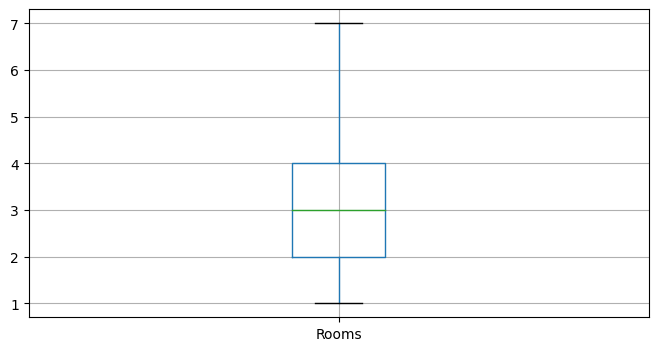

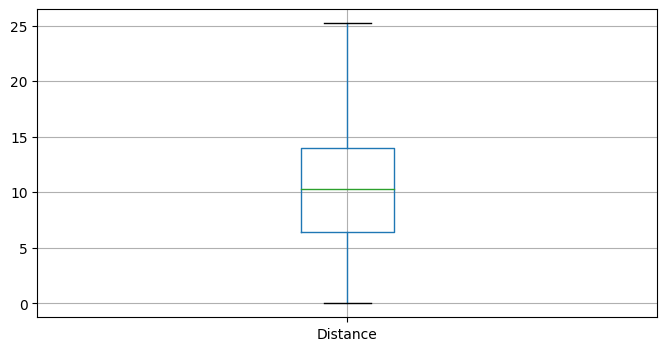

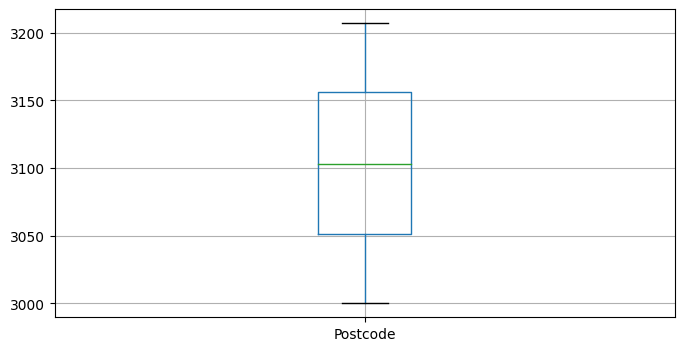

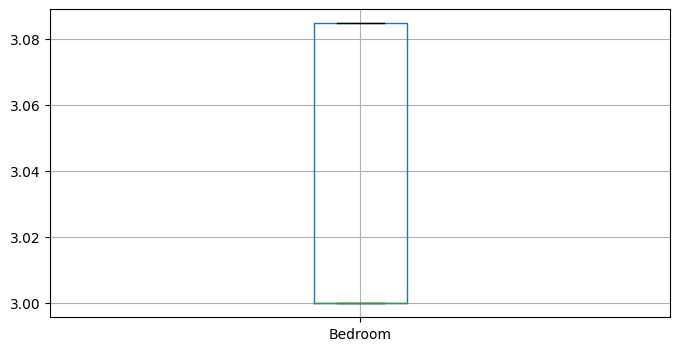

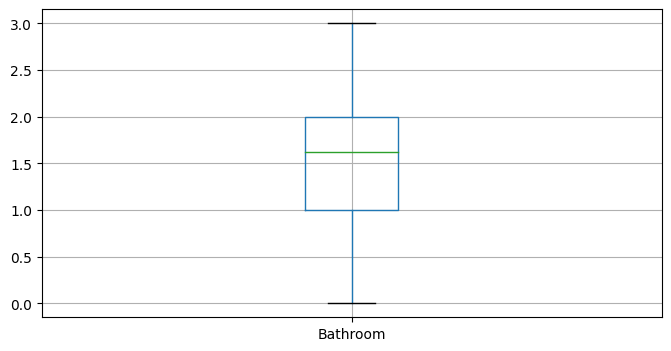

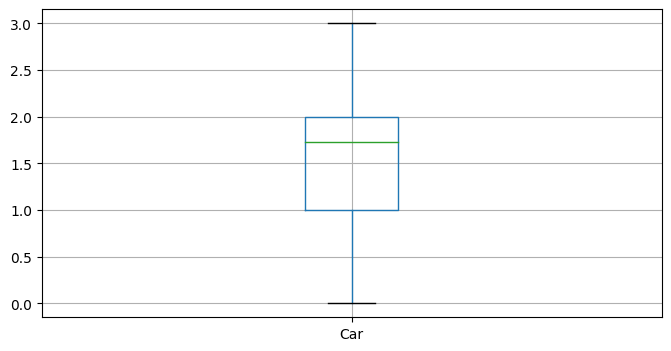

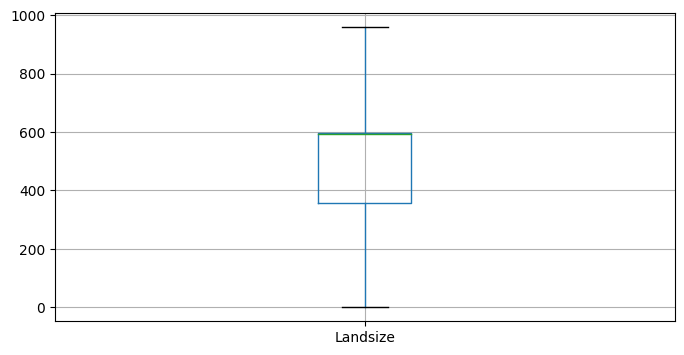

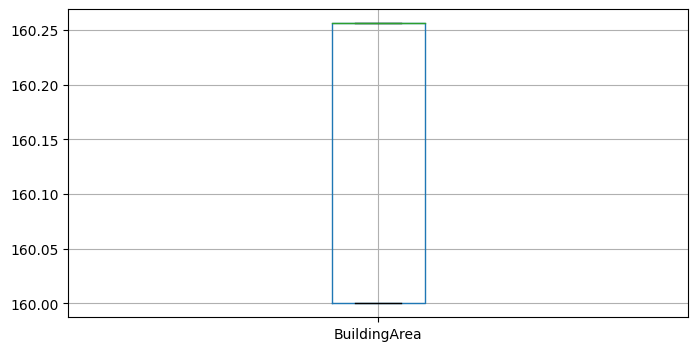

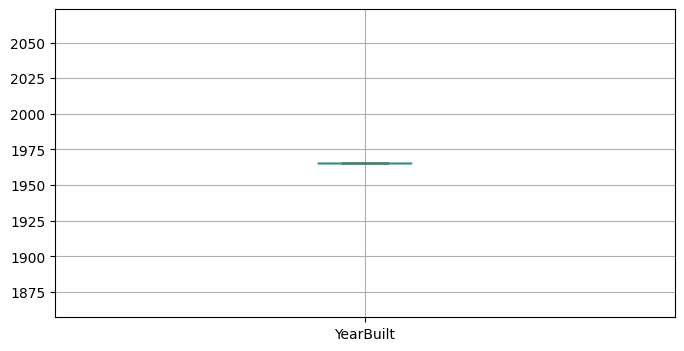

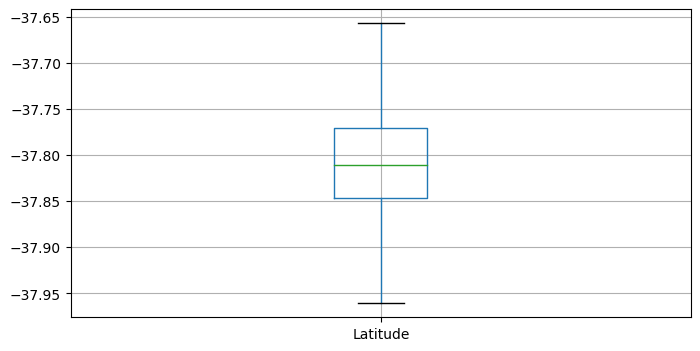

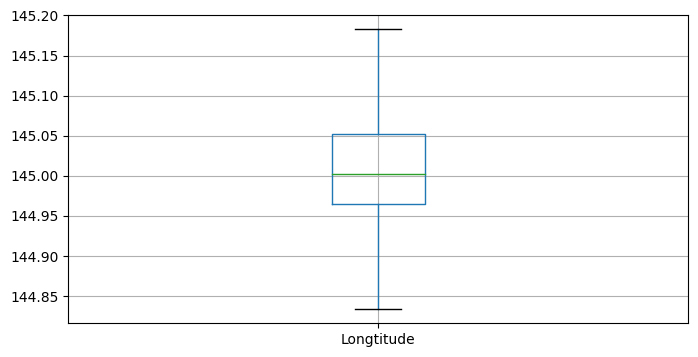

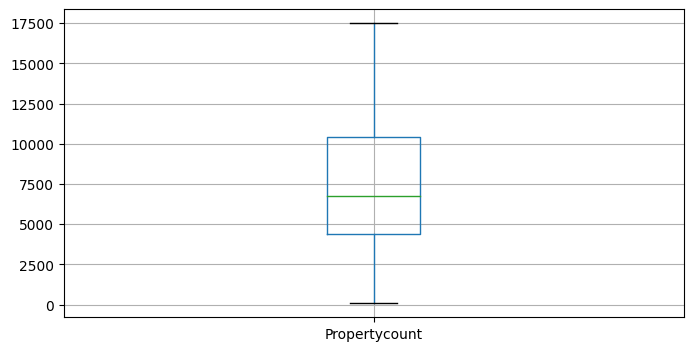

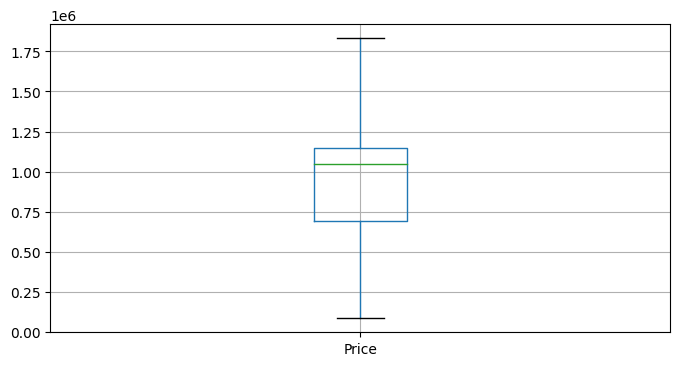

In [ ]:
createNumericBarPlot()

## Scaling and Normalizing Numeric Features

### Normalizing Numeric Features
Normalizing is the process of adjusting the data in numeric features in a dataset to fit into a scale between 0 and 1, so all the values in a numeric feature lie between 0 and 1.

Normalizing should be done on features with a non normal distribution, if you look at the histograms above that is all features above except latitude and longitude, hence my code above normalises all the numeric features except them two.

I make use of the **sklearn.preprocessing** libraries **MinMaxScaler**() method to scale the numeric feature.

Upon running the code you should see the new histogram plots, the x-axis scale is between 0 and 1, hence the numeric features were normalised

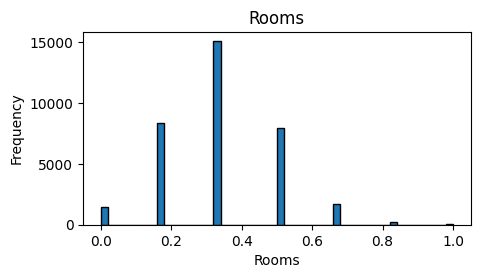

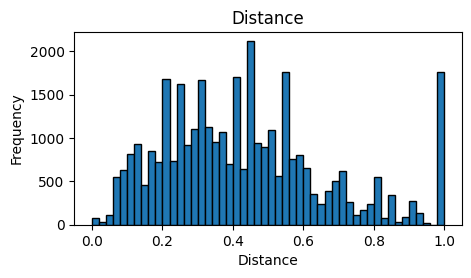

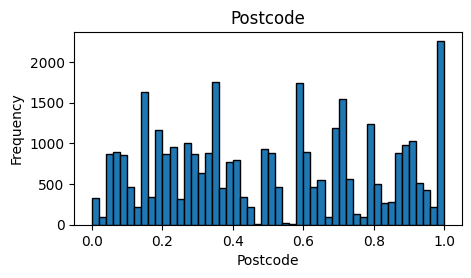

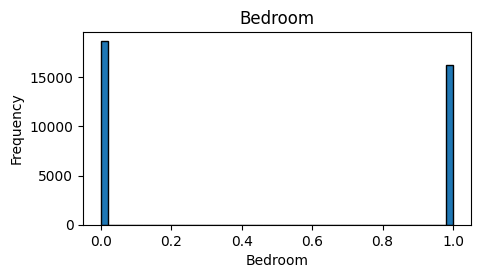

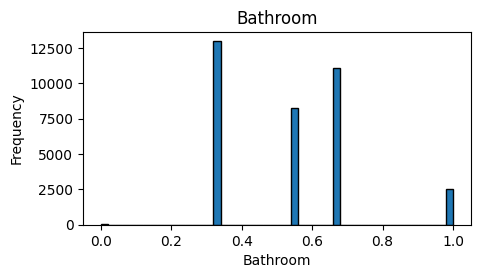

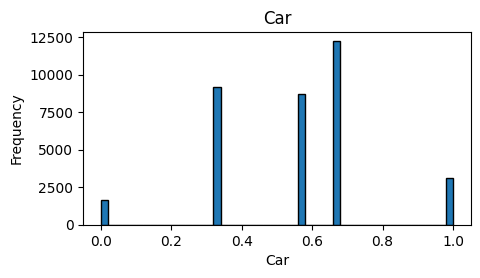

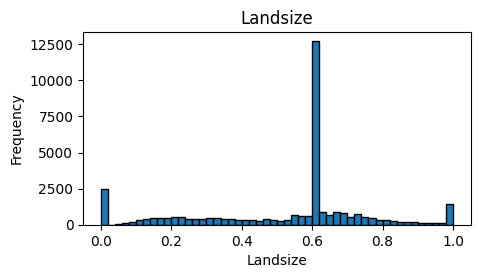

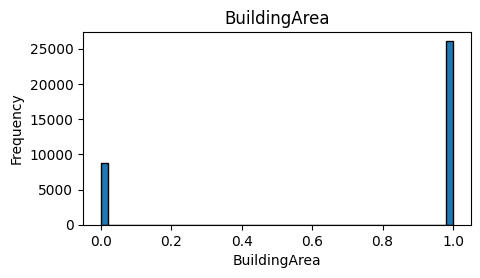

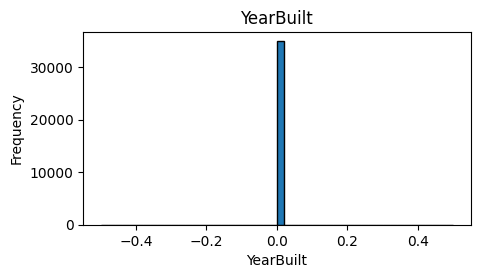

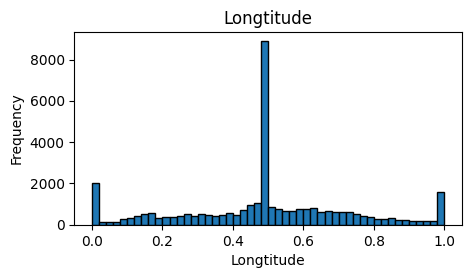

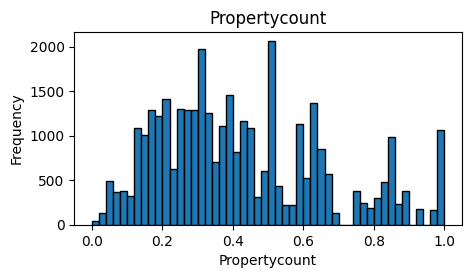

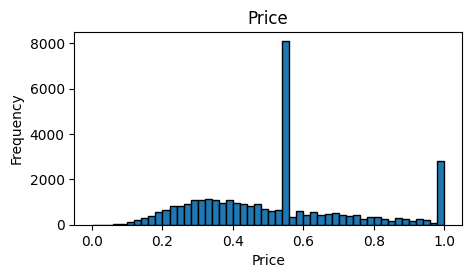

In [ ]:
scaler = MinMaxScaler()

for col in numeric_features:
  if (col != 'Latitude') or (col != 'Longitude'):
    reshapeCol = df[col].values.reshape(-1, 1) #Turn single feature array into 2D array using reshape
    df[col] = scaler.fit_transform(reshapeCol) #Using MinMaxScaler() method to normalise feature, takes in 2D array hence the reshaping above

#Below just plots the normalised feature
for col in numeric_features:
    if (col != 'Latitude') and (col != 'Longitude'):
        df[col].hist(bins=50, figsize=(5, 2.5), edgecolor='black')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show()

### Scaling Numeric Features
Scaling is the process of modifying numeric features data in a data set to have a mean of 0 and a standard deviation of 1.

I make use of the **sklearn.preprocessing** libraries **StandardScaler**() method to scale the numeric feature.

Scaling should be done for features that have a normal distribution, as mentioned above that is *Latitude* and *Longitude*, hence they are scaled.

Upon running the code you should see two plots, for *Latitude* and *Longitude* both having a mean of 0 and standard deviation of 1

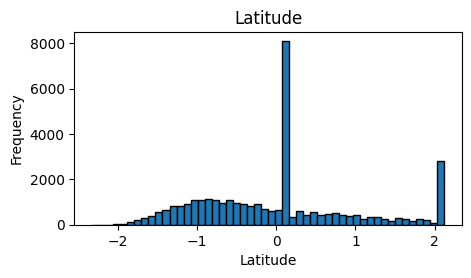

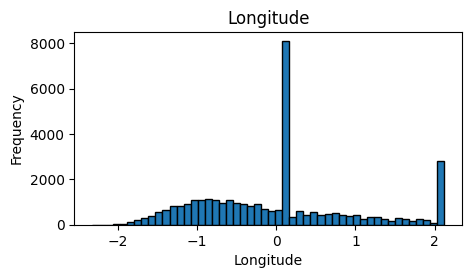

In [ ]:
#Scaling
scaler = StandardScaler()

def scaleAndPlot(col):
  df[col] = scaler.fit_transform(reshapeCol) #calling sklearn.preprocessing StandardScaler() method to scale the feature
  #Below just prints the feature
  df[col].hist(bins=50, figsize=(5, 2.5), edgecolor='black')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid(False)
  plt.show()

scaleAndPlot('Latitude')
scaleAndPlot('Longitude')

# Summary of the key findings from the EDA and feature engineering processes
## EDA findings

*   Plotting numeric features gives a better understanding of distribution which is useful for normalizing/scaling
*   Most numeric features, beside Latitude and Longitude and right (positive) skewed
*   Bar plots showed that categorical features contained many anomolies
*   Both numeric and categorical data contained many outliers

## Feature Engineering findings

*   Depending on the ordinal or nominal nature of a categorical feature, different encoding methods are used (labelling and one-hot respectivelly)
*   How creating interaction features creates new useful features in a dataset
*   How normally disributed data should be scaled and non-normally distributed data (skewed) should be normalized
*   Handling outliers can be done using winsoring methods







In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/Assigment1.ipynb

[NbConvertApp] Converting notebook /content/Assigment1.ipynb to pdf
[NbConvertApp] Support files will be in Assigment1_files/
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConvertApp] Making directory ./Assigment1_files
[NbConv